# Springboard Capstone 02 - Energy price prediction based on weather
## EDA

In [12]:
#Import libraries
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
from pytz import timezone
import missingno as msno
import matplotlib
from pandas import Grouper
from pandas import concat
from pandas import DataFrame
from windrose import WindroseAxes
import matplotlib.ticker as mtick

# 1.0 Import data

The relevant data are: energy_data.csv, weather_data.csv, eng_grouped_max.csv, wea_grouped_max.csv and energy_weather.csv

## 1.1 Importing base energy data

In [13]:
#Import data, convert to datetime in Madrid and set date as index
energy_data = pd.read_csv("data/energy_data.csv")
energy_data['time'] = pd.to_datetime(energy_data['time'], utc=True)
#Convert to Madrid timezone
energy_data.time = energy_data.time.dt.tz_convert('Europe/Madrid')

energy_data.set_index('time', inplace=True)
energy_data.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                      1051.0   
2015-01-01 01:00:00+01:00                                      1009.0   
2015-01-01 02:00:00+01:00                                       973.0   
2015-01-01 03:00:00+01:00                                       949.0   
2015-01-01 04:00:00+01:00                                       953.0   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                            1899.0   
2015-01-01 01:00:00+01:00                            1658.0   
2015-01-01 02:00:00+01:00                            1371.0   
2015-01-01 03:00:00+01:00                             779.0   
2015-01-01 04:00:00+01:00                             720.0   

                           generation marine  generation nuclear  ...  \
time                                                              ...   
2015-01-01 00:00:00+01:00                0.0              7096.0  ...   
2015-01-01 01:00:00+01:00                0.0              7096.0  ...   
2015-01-01 02:00:00+01:00                0.0              7099.0  ...   
2015-01-01 03:00:00+01:00                0.0              7098.0  ...   
2015-01-01 04:00:00+01:00                0.0              7097.0  ...   

                           generation waste  generation wind onshore  \
time                                                                   
2015-01-01 00:00:00+01:00             196.0                   6378.0   
2015-01-01 01:00:00+01:00             195.0                   5890.0   
2015-01

In [14]:
energy_data.drop(columns='generation marine', inplace=True)
energy_data.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'gen_total', 'diff_gen_load'],
      dtype='object')

## 1.2 Importing base weather data

In [15]:
#Import data, convert to datetime in Madrid and set date as index
weather_data = pd.read_csv("data/weather_data.csv")
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], utc=True)
#Convert to Madrid timezone
weather_data.dt_iso = weather_data.dt_iso.dt.tz_convert('Europe/Madrid')
weather_data.set_index('dt_iso', inplace=True)
weather_data.head()

city_name     temp  pressure  humidity  wind_speed  \
dt_iso                                                                         
2015-01-01 00:00:00+01:00  Valencia  270.475      1001        77           1   
2015-01-01 01:00:00+01:00  Valencia  270.475      1001        77           1   
2015-01-01 02:00:00+01:00  Valencia  269.686      1002        78           0   
2015-01-01 03:00:00+01:00  Valencia  269.686      1002        78           0   
2015-01-01 04:00:00+01:00  Valencia  269.686      1002        78           0   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
dt_iso                                                                      
2015-01-01 00:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        23      0.0      0.0      0.0           0

### 1.2.1 Converting temperature from Kelvin to Celcius

In [16]:
#Convert temp columns to Celcius
weather_data['temp'] = weather_data['temp']-273.15
weather_data.head()

city_name   temp  pressure  humidity  wind_speed  \
dt_iso                                                                       
2015-01-01 00:00:00+01:00  Valencia -2.675      1001        77           1   
2015-01-01 01:00:00+01:00  Valencia -2.675      1001        77           1   
2015-01-01 02:00:00+01:00  Valencia -3.464      1002        78           0   
2015-01-01 03:00:00+01:00  Valencia -3.464      1002        78           0   
2015-01-01 04:00:00+01:00  Valencia -3.464      1002        78           0   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
dt_iso                                                                      
2015-01-01 00:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        23      0.0      0.0      0.0           0

In [17]:
df = weather_data[weather_data['city_name'] == 'Barcelona']
df.head()

city_name   temp  pressure  humidity  wind_speed  \
dt_iso                                                                        
2015-01-01 00:00:00+01:00  Barcelona  8.475      1035       100           7   
2015-01-01 01:00:00+01:00  Barcelona  8.475      1035       100           7   
2015-01-01 02:00:00+01:00  Barcelona  8.136      1036       100           7   
2015-01-01 03:00:00+01:00  Barcelona  8.136      1036       100           7   
2015-01-01 04:00:00+01:00  Barcelona  8.136      1036       100           7   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
dt_iso                                                                      
2015-01-01 00:00:00+01:00        58      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        58      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        48      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        48      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        48      0.0      0.0      0.0           0

## 1.3 Importing summarized energy data

In [18]:
#Import data, convert to datetime in Madrid and set date as index
eng_grouped_max = pd.read_csv("data/eng_grouped_max.csv")
eng_grouped_max['date'] = pd.to_datetime(eng_grouped_max['date'], utc=True)
# #Convert to Madrid timezone
eng_grouped_max['date'] =eng_grouped_max['date'].dt.tz_convert('Europe/Madrid')
eng_grouped_max.set_index('date', inplace=True)
eng_grouped_max.head()

generation biomass_daily_max  \
date                                                      
2015-01-01 01:00:00+01:00                         449.0   
2015-01-02 01:00:00+01:00                         443.0   
2015-01-03 01:00:00+01:00                         478.0   
2015-01-04 01:00:00+01:00                         438.0   
2015-01-05 01:00:00+01:00                         376.0   

                           generation fossil brown coal/lignite_daily_max  \
date                                                                        
2015-01-01 01:00:00+01:00                                           329.0   
2015-01-02 01:00:00+01:00                                             0.0   
2015-01-03 01:00:00+01:00                                             0.0   
2015-01-04 01:00:00+01:00                                             0.0   
2015-01-05 01:00:00+01:00                                           326.0   

                           generation fossil gas_daily_max  \
date                                                         
2015-01-01 01:00:00+01:00                           5196.0   
2015-01-02 01:00:00+01:00                           6082.0   
2015-01-03 01:00:00+01:00                           4157.0   
2015-01-04 01:00:00+01:00                           3997.0   
2015-01-05 01:00:00+01:00                           5699.0   

                           generation fossil hard coal_daily_max  \
date                                                               
2015-01-01 01:00:00+01:00                                 5043.0   
2015-01-02 01:00:00+01:00                                 1432.0   
2015-01-03 01:00:00+01:00                                 1798.0   
2015-01-04 01:00:00+01:00                                 2755.0   
2015-01-05 01:00:00+01:00                                 4247.0   

                           generation fossil oil_daily_max  \
date                                                         
2015-01-01 01:00:00+01:00                            167.0   
2015-01-02 01:00:00+01:00                            220.0   
2015-01-03 01:00:00+01:00                            250.0   
2015-01-04 01:00:00+01:00                            394.0   
2015-01-05 01:00:00+01:00                            352.0   

                           generation hydro pumped storage consumption_daily_max  \
date                                                                               
2015-01-01 01:00:00+01:00                                             2170.0       
2015-01-02 01:00:00+01:00                                             3269.0       
2015-01-03 01:00:00+01:00                                             2953.0       
2015-01-04 01:00:00+01:00                                             2185.0       
2015-01-05 01:00:00+01:00                                             2365.0       

                           generation hydro run-of-river and poundage_daily_max  \
date                                                                              
2015-01-01 01:00:00+01:00                                             1220.0      
2015-01-02 01:00:00+01:00                                             1370.0      
2015-01-03 01:00:00+01:00                                             1583.0      
2015-01-04 01:00:00+01:00                                             1616.0      
2015-01-05 01:00:00+01:00                                             1328.0      

                           generation hydro water reservoir_daily_max  \
date                                                                    
2015-01-01 01:00:00+01:00                                      6231.0   
2015-01-02 01:00:00+01:00                                      5902.0   
2015-01-03 01:00:00+01:00                                      5985.0   
2015-01-04 01:00:00+01:00                                      5936.0   
2015-01-05 01:00:00+01:00                                      3732.0   

                           generation marin

In [19]:
eng_grouped_max.drop(columns='generation marine_daily_max', inplace=True)

## 1.4 Importing summarized weather data

In [20]:
#Import data, convert to datetime in Madrid and set date as index
wea_grouped_max = pd.read_csv("data/wea_grouped_max.csv")
wea_grouped_max.rename(columns={'Unnamed: 0': 'date', 'Unnamed: 1': 'city_name'}, inplace=True)
wea_grouped_max.drop(0, axis=0, inplace=True)
wea_grouped_max['date'] = pd.to_datetime(wea_grouped_max['date'], utc=True)
# #Convert to Madrid timezone
wea_grouped_max['date'] =wea_grouped_max['date'].dt.tz_convert('Europe/Madrid')
wea_grouped_max.set_index('date', inplace=True)
wea_grouped_max.head()

city_name  temp_daily_max  pressure_daily_max  \
date                                                                       
2015-01-01 01:00:00+01:00  Barcelona      284.602312              1038.0   
2015-01-01 01:00:00+01:00     Bilbao      284.591687              1036.0   
2015-01-01 01:00:00+01:00     Madrid      283.308312              1036.0   
2015-01-01 01:00:00+01:00    Seville      286.994000              1043.0   
2015-01-01 01:00:00+01:00   Valencia      285.277344              1035.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-01 01:00:00+01:00                97.0                   1.0   
2015-01-01 01:00:00+01:00                75.0                   1.0   
2015-01-01 01:00:00+01:00                84.0                   4.0   
2015-01-01 01:00:00+01:00                84.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   

                           snow_3h_daily_max  clouds_all_daily_max  
date                                                                
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-01 01:00:00+01:00                0.0                  24.0  
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-01 01:00:00+01:00                0.0                   0.0

In [21]:
#Convert temp columns to Celcius
wea_grouped_max['temp_daily_max'] = wea_grouped_max['temp_daily_max']-273.15
wea_grouped_max.head()

city_name  temp_daily_max  pressure_daily_max  \
date                                                                       
2015-01-01 01:00:00+01:00  Barcelona       11.452313              1038.0   
2015-01-01 01:00:00+01:00     Bilbao       11.441688              1036.0   
2015-01-01 01:00:00+01:00     Madrid       10.158313              1036.0   
2015-01-01 01:00:00+01:00    Seville       13.844000              1043.0   
2015-01-01 01:00:00+01:00   Valencia       12.127344              1035.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-01 01:00:00+01:00                97.0                   1.0   
2015-01-01 01:00:00+01:00                75.0                   1.0   
2015-01-01 01:00:00+01:00                84.0                   4.0   
2015-01-01 01:00:00+01:00                84.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   

                           snow_3h_daily_max  clouds_all_daily_max  
date                                                                
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-01 01:00:00+01:00                0.0                  24.0  
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-01 01:00:00+01:00                0.0                   0.0

# Need to find out how to drop the time from the date

## 1.5 Importing merged (energy and weather) data

In [22]:
#Import data, convert to datetime in Madrid and set date as index
energy_weather = pd.read_csv("data/energy_weather.csv")
energy_weather.drop(columns='Unnamed: 0', inplace=True)
energy_weather['date'] = pd.to_datetime(energy_weather['date'], utc=True)
# # #Convert to Madrid timezone
energy_weather['date'] = energy_weather['date'].dt.tz_convert('Europe/Madrid')
energy_weather.set_index('date', inplace=True)
energy_weather.head()

city_name  temp_daily_max  pressure_daily_max  \
date                                                                       
2015-01-01 01:00:00+01:00  Barcelona      284.602312              1038.0   
2015-01-01 01:00:00+01:00     Bilbao      284.591687              1036.0   
2015-01-01 01:00:00+01:00     Madrid      283.308312              1036.0   
2015-01-01 01:00:00+01:00    Seville      286.994000              1043.0   
2015-01-01 01:00:00+01:00   Valencia      285.277344              1035.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-01 01:00:00+01:00                97.0                   1.0   
2015-01-01 01:00:00+01:00                75.0                   1.0   
2015-01-01 01:00:00+01:00                84.0                   4.0   
2015-01-01 01:00:00+01:00                84.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   

                           snow_3h_daily_max  clouds_all_daily_max  \
date                                                                 
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                  24.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   

                           generation biomass_daily_max  ...  \
date                                                     ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   

                           generation wind onshore_daily_max  \
date                                                           
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   

                           forecast solar day ahead  \
date                                                  
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   

                           forecast wind onshore day ahead  \
date                                                         
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   

                           total load forecast  total load actual  \
date                                                                
2015-01-01 01:00:00+01:00              30739.0            29571.0   
2015-01-01 01:00:00+01:00              30739.0            29571.0   
2015-01-01 01:00:00+01:00              3

In [23]:
#Convert temp columns to Celcius
energy_weather['temp_daily_max'] = energy_weather['temp_daily_max']-273.15
energy_weather.head()

city_name  temp_daily_max  pressure_daily_max  \
date                                                                       
2015-01-01 01:00:00+01:00  Barcelona       11.452313              1038.0   
2015-01-01 01:00:00+01:00     Bilbao       11.441688              1036.0   
2015-01-01 01:00:00+01:00     Madrid       10.158313              1036.0   
2015-01-01 01:00:00+01:00    Seville       13.844000              1043.0   
2015-01-01 01:00:00+01:00   Valencia       12.127344              1035.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-01 01:00:00+01:00                97.0                   1.0   
2015-01-01 01:00:00+01:00                75.0                   1.0   
2015-01-01 01:00:00+01:00                84.0                   4.0   
2015-01-01 01:00:00+01:00                84.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   

                           snow_3h_daily_max  clouds_all_daily_max  \
date                                                                 
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                  24.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   

                           generation biomass_daily_max  ...  \
date                                                     ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   

                           generation wind onshore_daily_max  \
date                                                           
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   

                           forecast solar day ahead  \
date                                                  
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   

                           forecast wind onshore day ahead  \
date                                                         
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   

                           total load forecast  total load actual  \
date                                                                
2015-01-01 01:00:00+01:00              30739.0            29571.0   
2015-01-01 01:00:00+01:00              30739.0            29571.0   
2015-01-01 01:00:00+01:00              3

In [24]:
energy_weather.drop(columns='generation marine_daily_max', inplace=True)

# Need to find out how to drop the time from the date

# 2.0 Visualizing basic weather data

1. What are the trends in energy data over the 4 years?
2. What are the trends in weather data over the 4 years?
3. <b>Is there a correlation between any of the weather data and any of the generation data or price data?</b>
4. What is the difference in generation based on month/season?
5. What is the correlation between demand and month or day of week?
6. Does one city have more influence over things than another? <b>Graph xx?xx with city as the hue</b>
7. <b>Graph - solar & solar day ahead, wind and wind day ahead, load forcast and load actual, price day ahead and price actual</b>
8. Maybe - break out each city into its own df - plot the 4 years with mean to compare the city to itself.
9. Maybe calculate mean temperatures per month and graph those?
10. Maybe use that DC "Viusalizing patterns over time" plot? https://campus.datacamp.com/courses/exploratory-data-analysis-in-python/relationships-in-data?ex=1
11. Or box plots for each feature? Although it might be weird given seasonability.
12. How to graph changes year to year?
13. How do the temperatures in each city relate to the other cities?
14. Any significant items/outliers in terms of MW for energy and values for  weather?
15. Is it possible to determine what the target variable is and the independent variables?
16. What is the hypothesis?
17. Ultimately want to find relationships between weather and generation. 

## 2.1 Subsetting weather data on Barcelona, 2015

In [25]:
#subset data for testing out plotting
barca = weather_data[weather_data['city_name'] == "Barcelona"]
wd_mini = barca.loc['2015-01-01': '2015-12-31']
wd_mini.head()

city_name   temp  pressure  humidity  wind_speed  \
dt_iso                                                                        
2015-01-01 00:00:00+01:00  Barcelona  8.475      1035       100           7   
2015-01-01 01:00:00+01:00  Barcelona  8.475      1035       100           7   
2015-01-01 02:00:00+01:00  Barcelona  8.136      1036       100           7   
2015-01-01 03:00:00+01:00  Barcelona  8.136      1036       100           7   
2015-01-01 04:00:00+01:00  Barcelona  8.136      1036       100           7   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
dt_iso                                                                      
2015-01-01 00:00:00+01:00        58      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        58      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        48      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        48      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        48      0.0      0.0      0.0           0

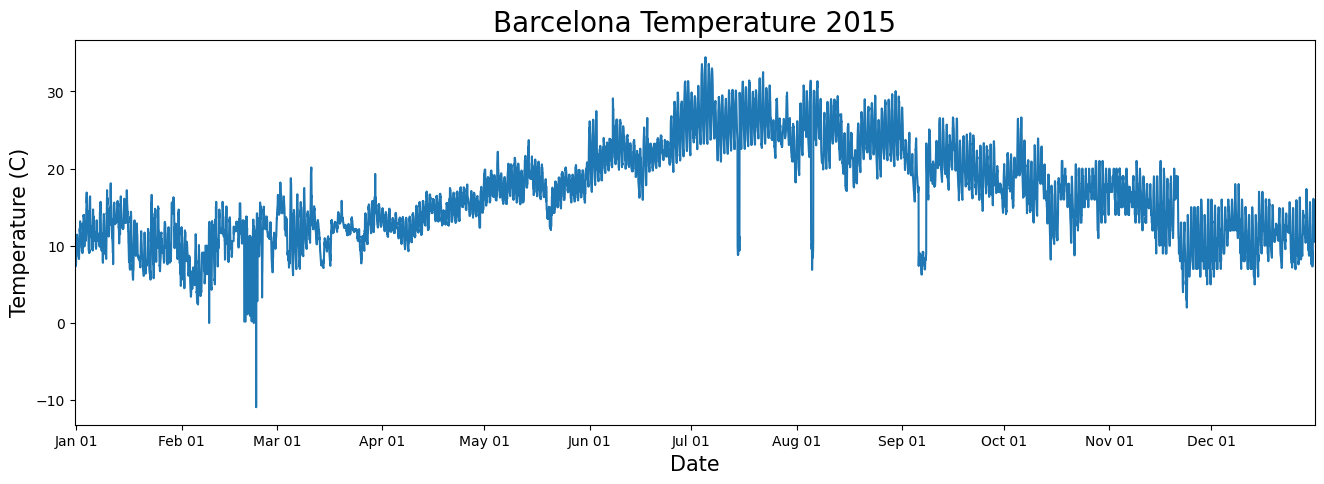

In [26]:
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(wd_mini.index, wd_mini['temp'])
plt.title('Barcelona Temperature 2015', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature (C)', fontsize=15)
plt.xlim(wd_mini.index.min(), wd_mini.index.max())

# Defining and displaying time axis ticks
ticks = ['2015-01-01 12:00:00+00:00', '2015-02-01 12:00:00+00:00', '2015-03-01 12:00:00+00:00',
        '2015-04-01 12:00:00+00:00', '2015-05-01 12:00:00+00:00', '2015-06-01 12:00:00+00:00',
        '2015-07-01 12:00:00+00:00', '2015-08-01 12:00:00+00:00', '2015-09-01 12:00:00+00:00',
        '2015-10-01 12:00:00+00:00', '2015-11-01 12:00:00+00:00', '2015-12-01 12:00:00+00:00']
plt.xticks(ticks)

#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))

(755, 12)


Text(0, 0.5, 'Temperature (C)')

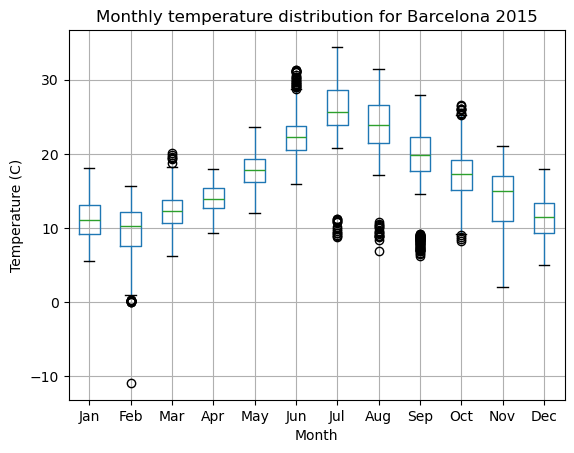

In [27]:
#box plots by month
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#one_year = series['1990']
#barcelona temperatures for the whole year: 24 hours x 365
barc_temp = wd_mini.temp
groups = barc_temp.groupby(Grouper(freq='ME'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
print(months.shape)
#months.columns = range(1,13)
months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months.boxplot()
plt.title("Monthly temperature distribution for Barcelona 2015")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")

Text(0.5, 1.0, 'Windrose for Barcelona')

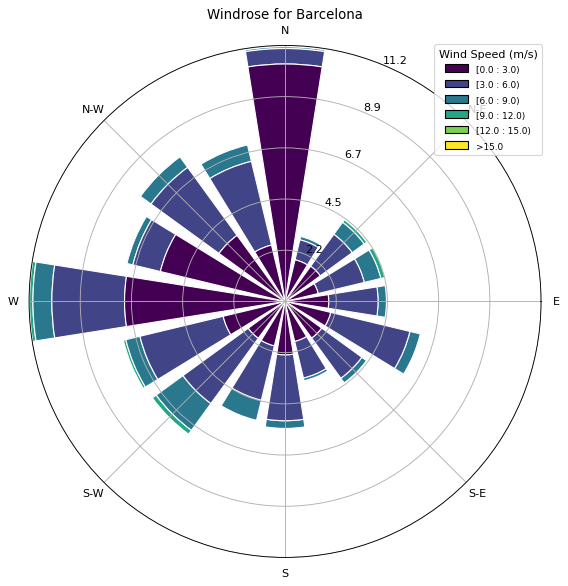

In [42]:
ax = WindroseAxes.from_ax()
ax.bar(barca.wind_deg, barca.wind_speed, normed=True, opening=0.8, edgecolor='white')

# Format radius axis to percentages
# fmt = '%.0f%%' 
# yticks = mtick.FormatStrFormatter(fmt)
# ax.yaxis.set_major_formatter(yticks)

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title("Windrose for Barcelona")

## 2.2 Visualizing weather data for cities and years using hourly data

In [44]:
#Create df for each city
city_names = weather_data.city_name.unique()
city_dfs = []
for i in range(len(city_names)):
    df = weather_data[weather_data['city_name'] == city_names[i]]
    city_dfs.append(df)

In [136]:
years = ['2015', '2016', '2017', '2018']

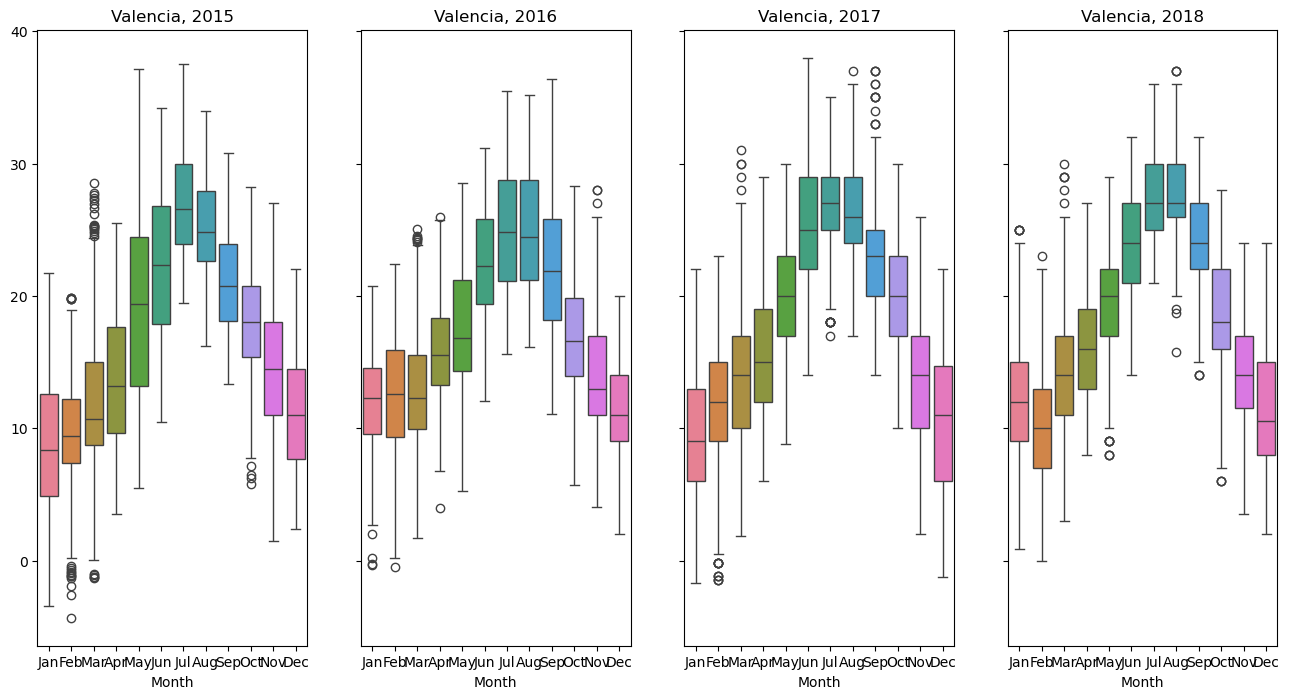

In [135]:
#For each city, plot temperature boxplots for each year

# Create figure and axes
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

# Plot multiple boxplots
#ax.boxplot([data1, data2, data3], positions=[1, 2, 3], labels=['Data 1', 'Data 2', 'Data 3'])
#ax.boxplot([data1, data2, data3], positions=[1, 2, 3, 4], labels=[years])

months_list=[]
for i in range(len(years)):
    df_year = city_dfs[0].loc[years[i]]
    df_temp = df_year.temp
    groups = df_temp.groupby(Grouper(freq='ME'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_list.append(months)
    sns.boxplot(months, ax=ax[i])
    #ax[i].set_title(f"Monthly temperature distribution for {city_names[0]}, {years[i]}")
    ax[i].set_title(f"{city_names[0]}, {years[i]}")
    ax[i].set_xlabel("Month")
    #ax[0].ylabel('Temperature (C)')
    #ax[i].ylabel("Temperature (C)")
    #plt.title(f'Temperature (C) for {city_names[0]}')

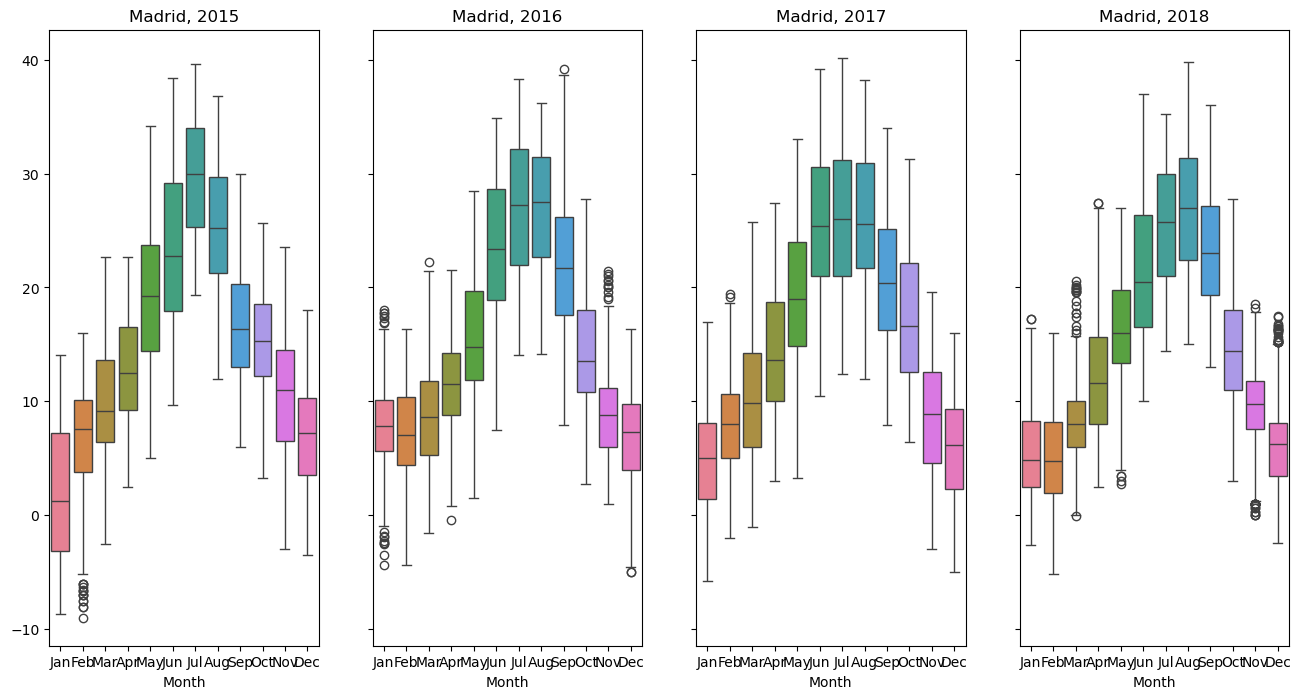

In [137]:
#For each city, plot temperature boxplots for each year

# Create figure and axes
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

months_list=[]
for i in range(len(years)):
    df_year = city_dfs[1].loc[years[i]]
    df_temp = df_year.temp
    groups = df_temp.groupby(Grouper(freq='ME'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_list.append(months)
    sns.boxplot(months, ax=ax[i])
    ax[i].set_title(f"{city_names[1]}, {years[i]}")
    ax[i].set_xlabel("Month")

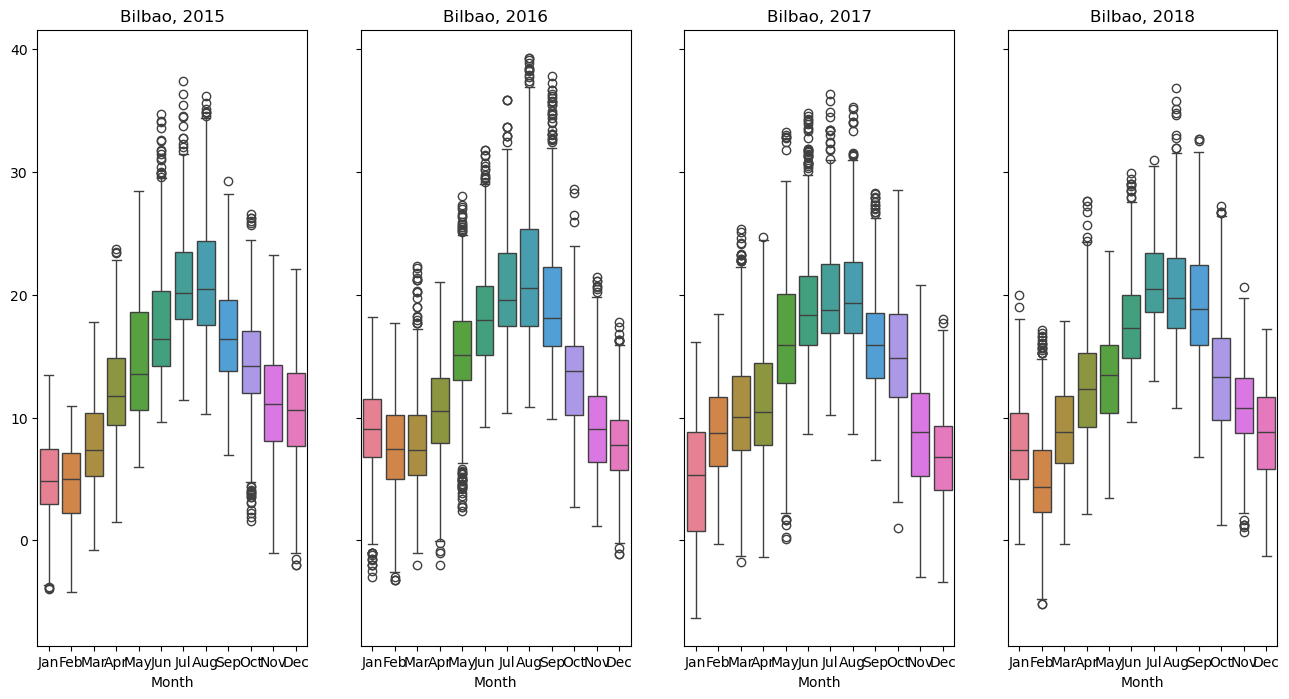

In [138]:
#For each city, plot temperature boxplots for each year

# Create figure and axes
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

months_list=[]
for i in range(len(years)):
    df_year = city_dfs[2].loc[years[i]]
    df_temp = df_year.temp
    groups = df_temp.groupby(Grouper(freq='ME'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_list.append(months)
    sns.boxplot(months, ax=ax[i])
    ax[i].set_title(f"{city_names[2]}, {years[i]}")
    ax[i].set_xlabel("Month")

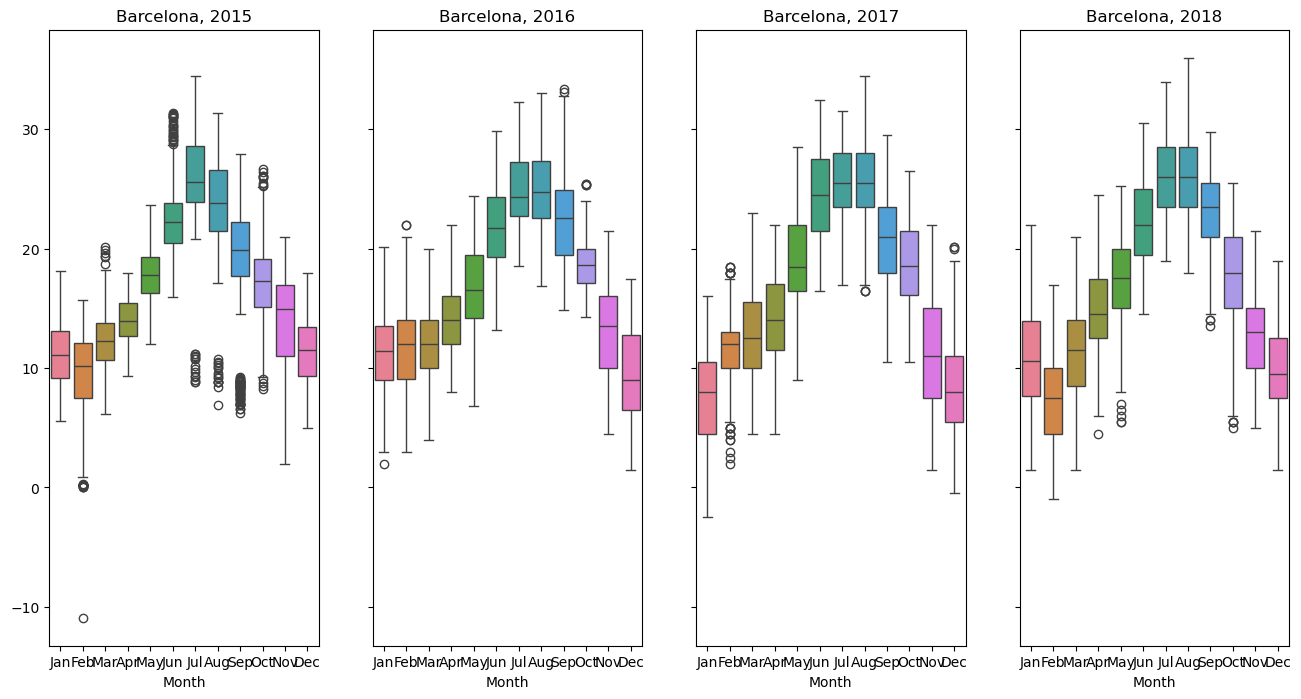

In [139]:
#For each city, plot temperature boxplots for each year

# Create figure and axes
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

months_list=[]
for i in range(len(years)):
    df_year = city_dfs[3].loc[years[i]]
    df_temp = df_year.temp
    groups = df_temp.groupby(Grouper(freq='ME'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_list.append(months)
    sns.boxplot(months, ax=ax[i])
    ax[i].set_title(f"{city_names[3]}, {years[i]}")
    ax[i].set_xlabel("Month")

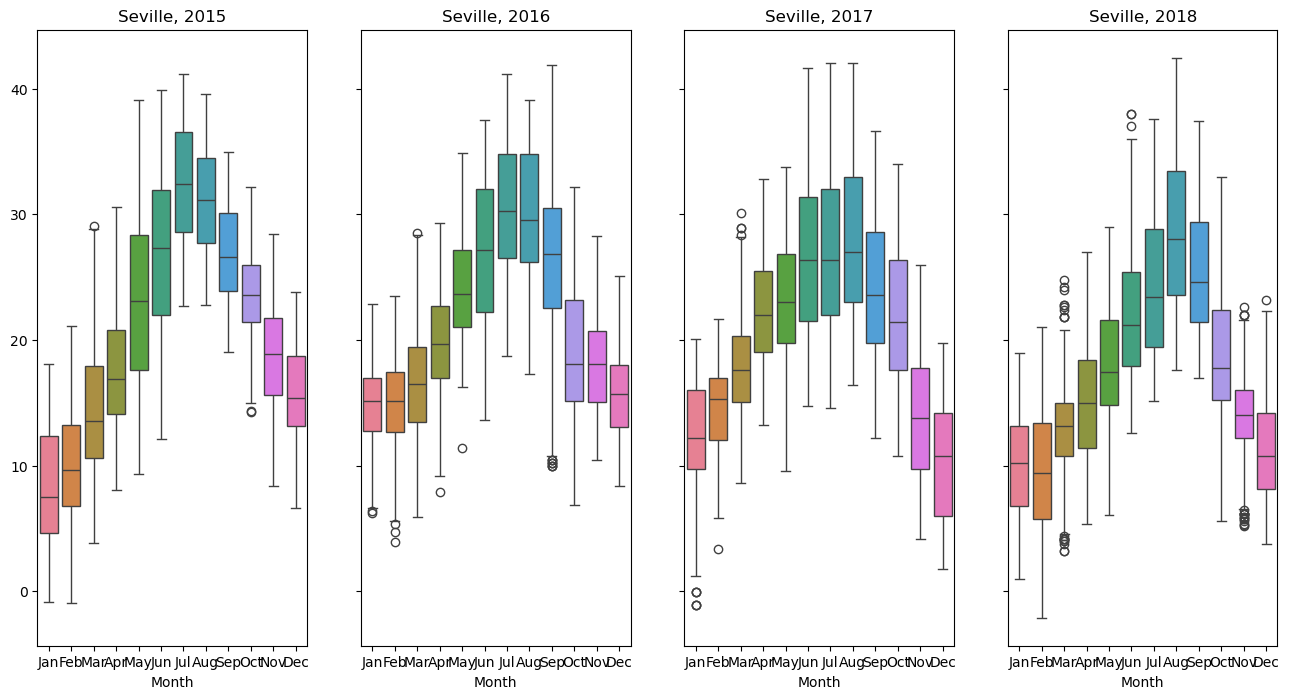

In [140]:
#For each city, plot temperature boxplots for each year

# Create figure and axes
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(16, 8))

months_list=[]
for i in range(len(years)):
    df_year = city_dfs[4].loc[years[i]]
    df_temp = df_year.temp
    groups = df_temp.groupby(Grouper(freq='ME'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1)
    months = DataFrame(months)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_list.append(months)
    sns.boxplot(months, ax=ax[i])
    ax[i].set_title(f"{city_names[4]}, {years[i]}")
    ax[i].set_xlabel("Month")

## 2.3 Visualizing weather data using daily max data

In [81]:
#Create df for each city from max weather data
city_names_max = wea_grouped_max.city_name.unique()
city_max_dfs = []
for i in range(len(city_names_max)):
    df = wea_grouped_max[wea_grouped_max['city_name'] == city_names_max[i]]
    city_max_dfs.append(df)

In [99]:
#Create df for each city from weather data
city_names = weather_data.city_name.unique()
city_dfs = []
for i in range(len(city_names)):
    df = weather_data[weather_data['city_name'] == city_names[i]]
    city_dfs.append(df)

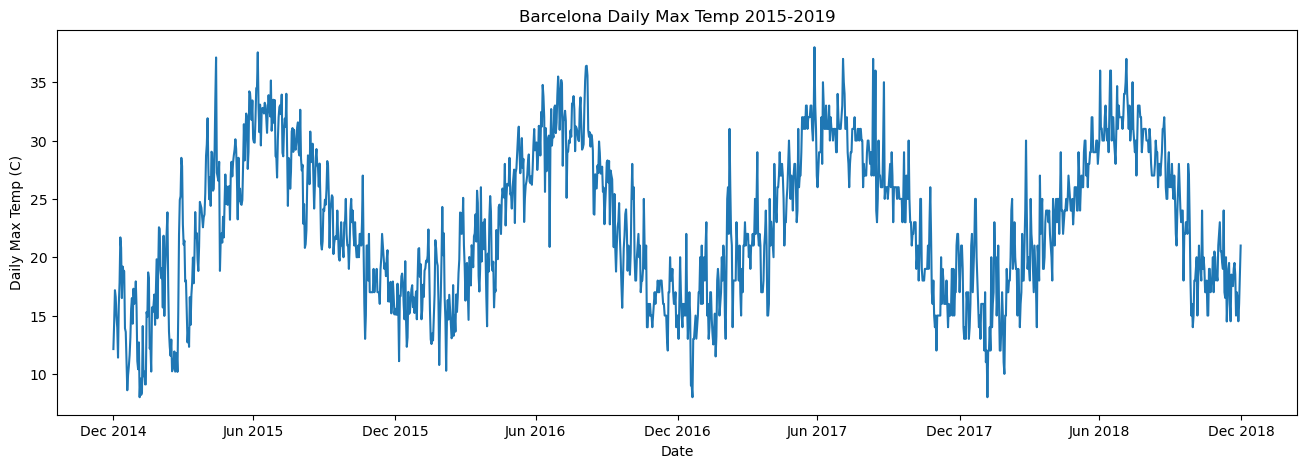

In [86]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=city_max_dfs[0], x='date', y='temp_daily_max')
plt.title(f'{city_names_max[0]} Daily Max Temp 2015-2019')
plt.xlabel('Date')
plt.ylabel('Daily Max Temp (C)')

#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

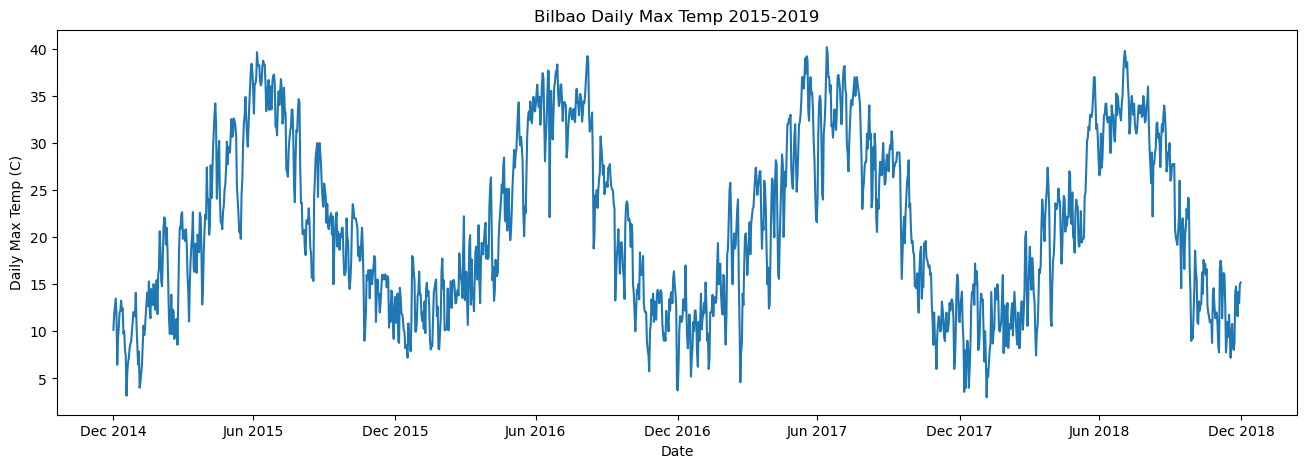

In [87]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=city_max_dfs[1], x='date', y='temp_daily_max')
plt.title(f'{city_names_max[1]} Daily Max Temp 2015-2019')
plt.xlabel('Date')
plt.ylabel('Daily Max Temp (C)')
#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

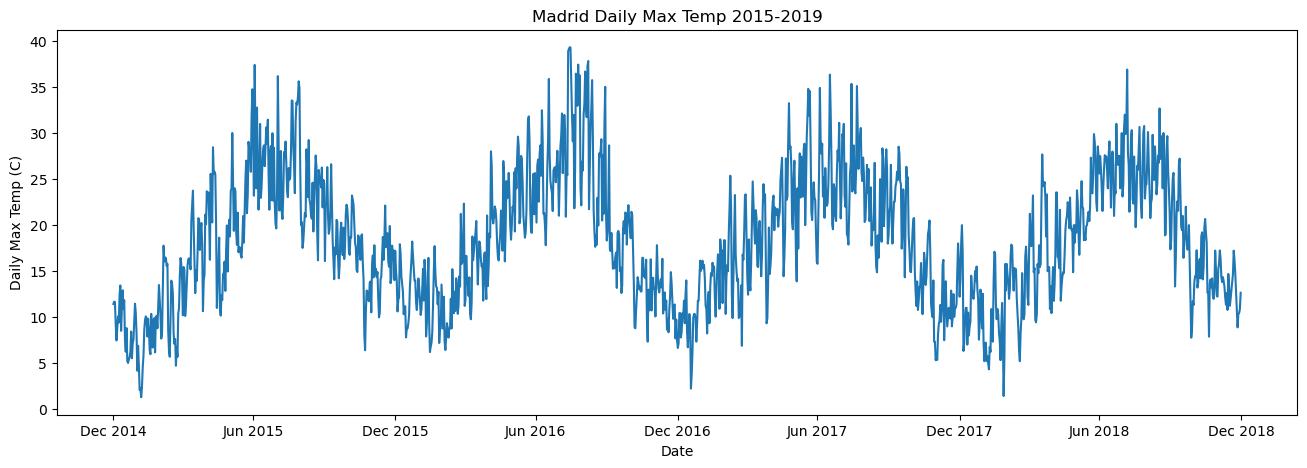

In [88]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=city_max_dfs[2], x='date', y='temp_daily_max')
plt.title(f'{city_names_max[2]} Daily Max Temp 2015-2019')
plt.xlabel('Date')
plt.ylabel('Daily Max Temp (C)')
#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

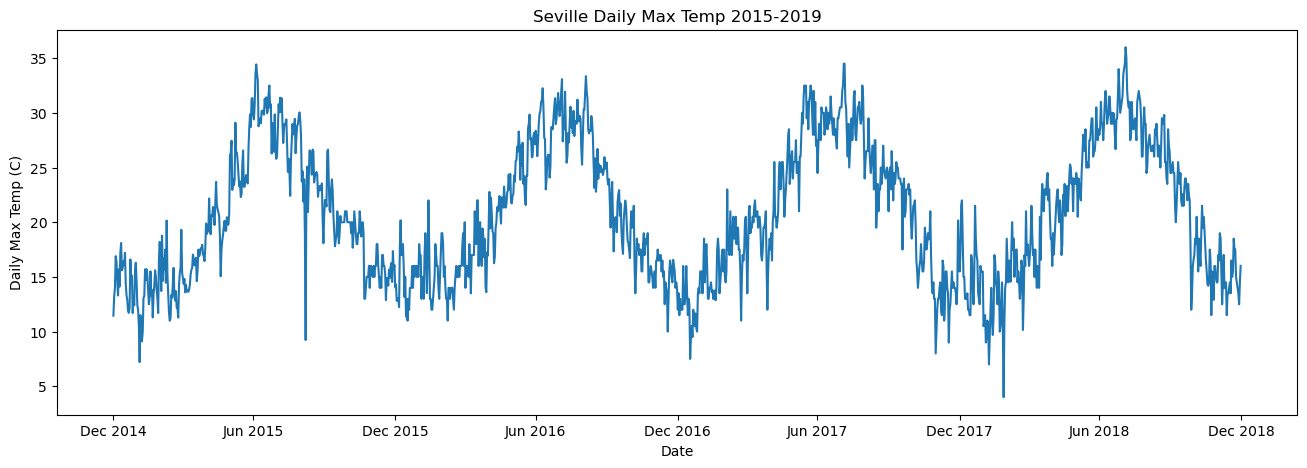

In [89]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=city_max_dfs[3], x='date', y='temp_daily_max')
plt.title(f'{city_names_max[3]} Daily Max Temp 2015-2019')
plt.xlabel('Date')
plt.ylabel('Daily Max Temp (C)')
#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

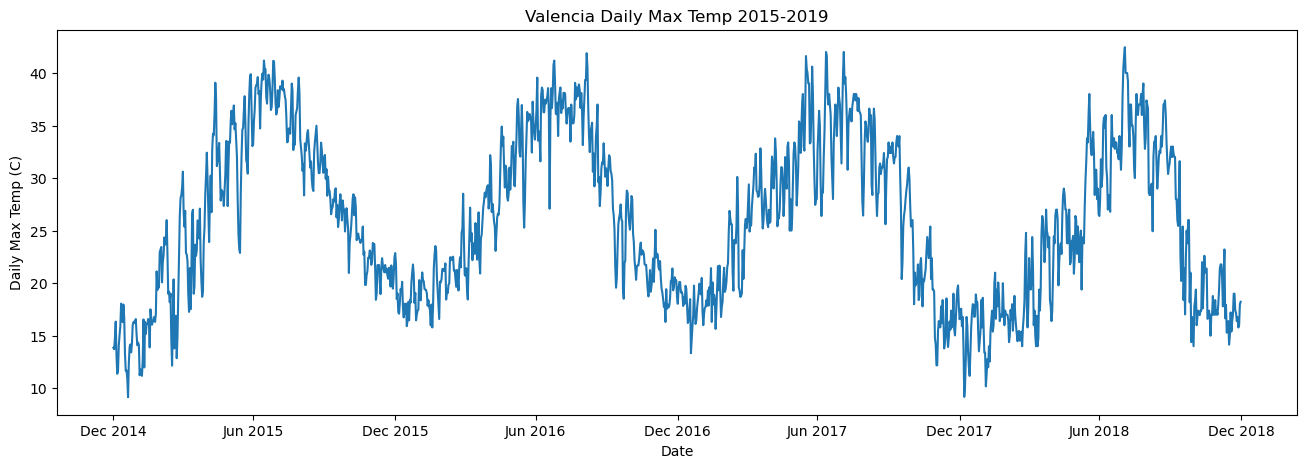

In [91]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=city_max_dfs[4], x='date', y='temp_daily_max')
plt.title(f'{city_names_max[4]} Daily Max Temp 2015-2019')
plt.xlabel('Date')
plt.ylabel('Daily Max Temp (C)')
#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

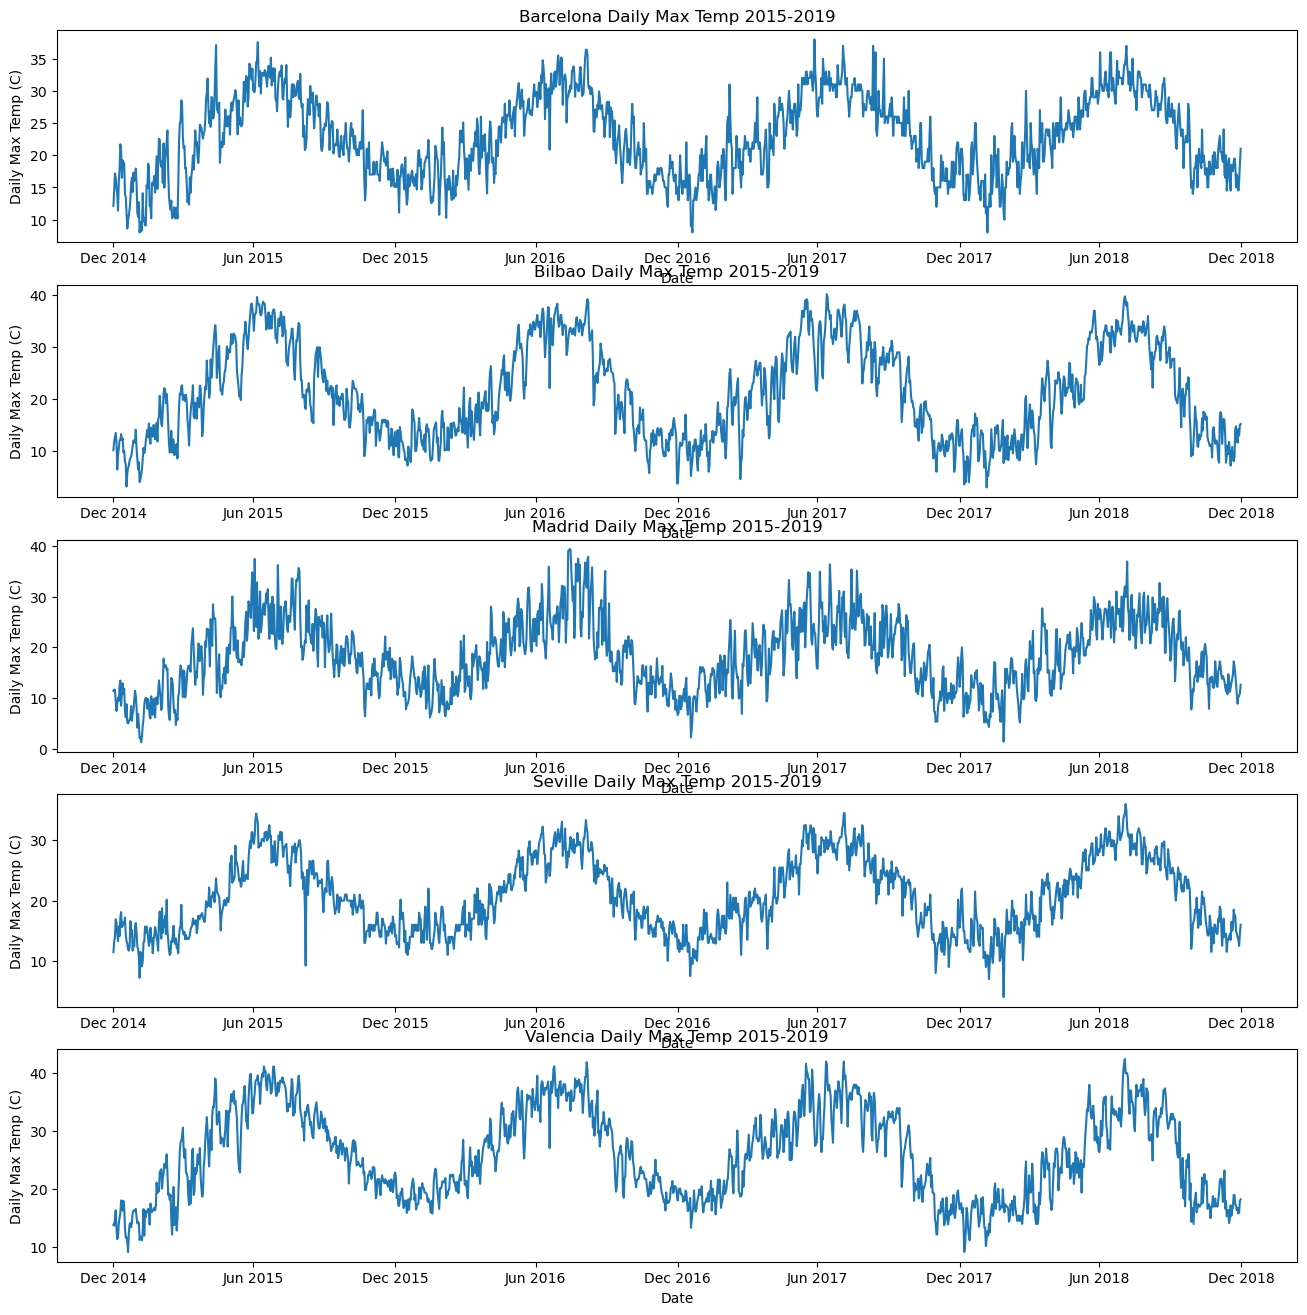

In [125]:
fig, ax = plt.subplots(5, 1, figsize=(16, 16))
for i in range(len(city_max_dfs)):
    sns.lineplot(data=city_max_dfs[i], x='date', y='temp_daily_max', ax=ax[i])
    ax[i].set_title(f'{city_names_max[i]} Daily Max Temp 2015-2019')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Daily Max Temp (C)')
    #Formatting x-axis(dates)
    ax[i].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

## 2.4 Visualizing daily max data using melt

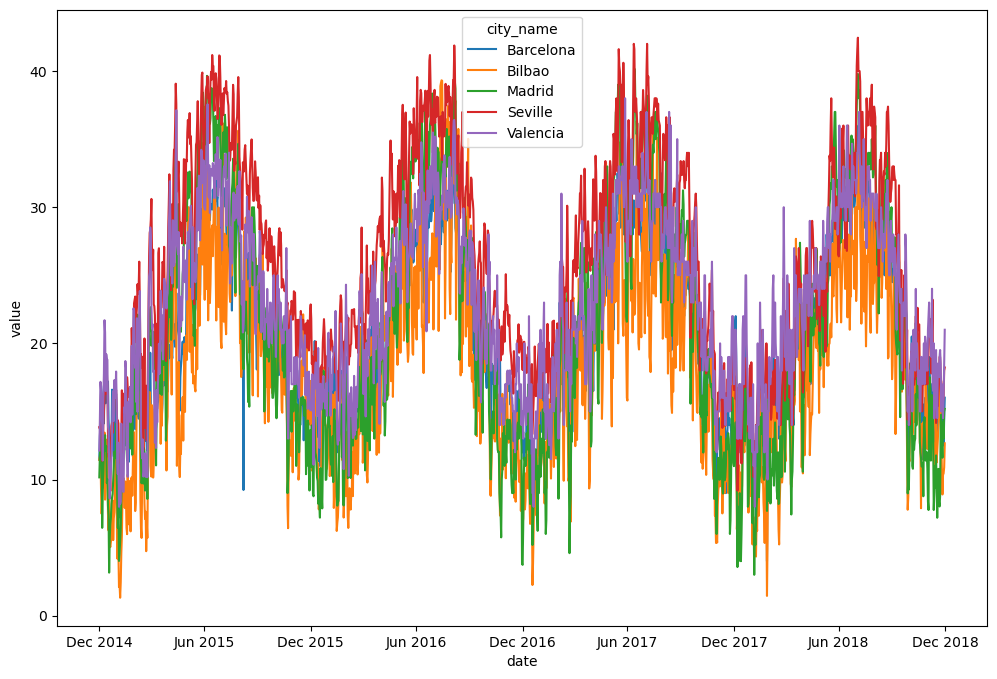

In [118]:
fig, ax = plt.subplots(figsize=(12, 8))
#try melt method for temperature
df_temp = wea_grouped_max[['city_name', 'temp_daily_max']]
df_temp.reset_index(inplace=True)
df_temp.head()
df_melt = pd.melt(df_temp, id_vars=['date', 'city_name'], value_vars=['temp_daily_max'])
df_melt.head()
sns.lineplot(df_melt, x='date', y='value', hue='city_name')
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))

In [94]:
city_max_dfs[0

city_name  temp_daily_max  pressure_daily_max  \
date                                                                      
2015-01-01 01:00:00+01:00  Valencia       12.127344              1035.0   
2015-01-02 01:00:00+01:00  Valencia       14.403688              1037.0   
2015-01-03 01:00:00+01:00  Valencia       17.173000              1032.0   
2015-01-04 01:00:00+01:00  Valencia       16.592000              1018.0   
2015-01-05 01:00:00+01:00  Valencia       14.908000              1028.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00                84.0                   2.0   
2015-01-02 01:00:00+01:00                82.0                   2.0   
2015-01-03 01:00:00+01:00                80.0                   2.0   
2015-01-04 01:00:00+01:00                92.0                   2.0   
2015-01-05 01:00:00+01:00                91.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-03 01:00:00+01:00                0.0                0.0   
2015-01-04 01:00:00+01:00                0.0                0.0   
2015-01-05 01:00:00+01:00                0.0                0.0   

                           snow_3h_daily_max  clouds_all_daily_max  
date                                                                
2015-01-01 01:00:00+01:00                0.0                   0.0  
2015-01-02 01:00:00+01:00                0.0                   0.0  
2015-01-03 01:00:00+01:00                0.0                  12.0  
2015-01-04 01:00:00+01:00                0.0                   0.0  
2015-01-05 01:00:00+01:00                0.0                   0.0

Text(0.5, 1.0, 'Windrose for Valencia')

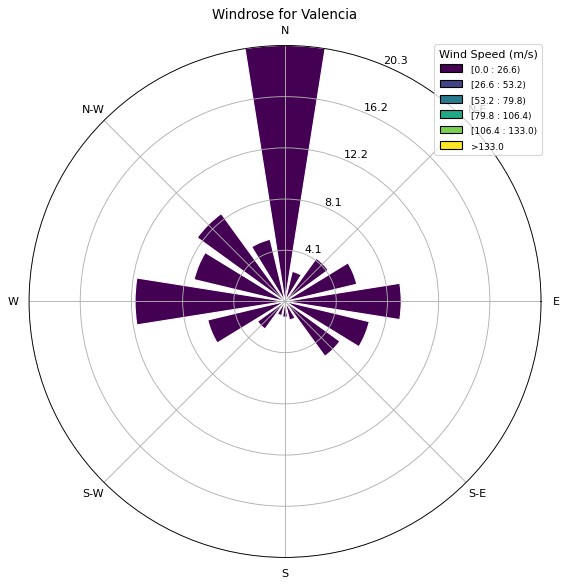

In [100]:
ax = WindroseAxes.from_ax()
ax.bar(city_dfs[0].wind_deg, city_dfs[0].wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title(f"Windrose for {city_names[0]}")

Text(0.5, 1.0, 'Windrose for Madrid')

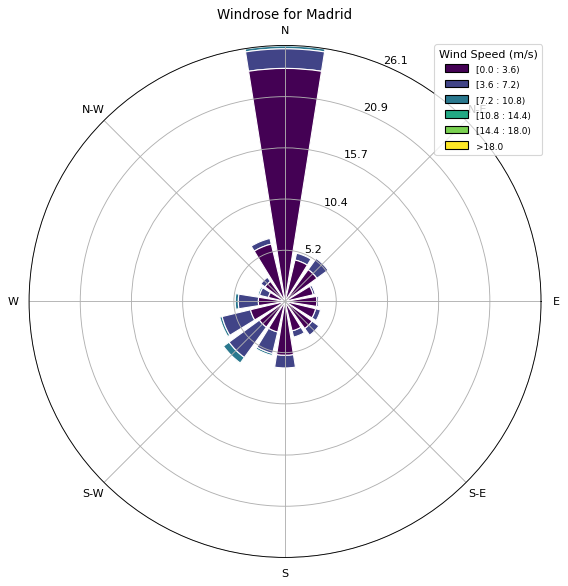

In [102]:
ax = WindroseAxes.from_ax()
ax.bar(city_dfs[1].wind_deg, city_dfs[1].wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title(f"Windrose for {city_names[1]}")

Text(0.5, 1.0, 'Windrose for Bilbao')

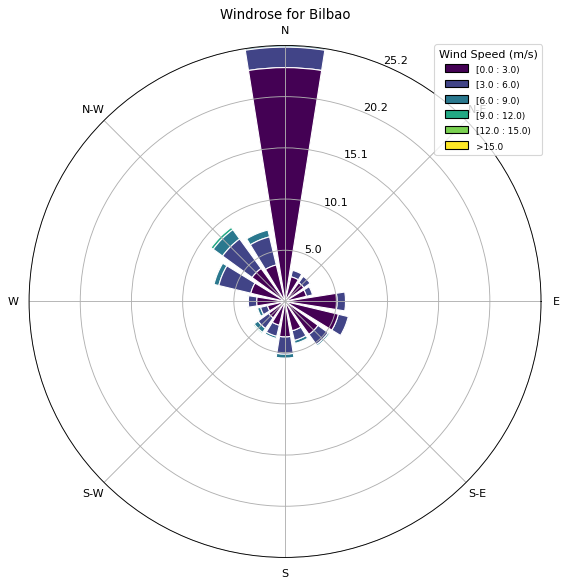

In [103]:
ax = WindroseAxes.from_ax()
ax.bar(city_dfs[2].wind_deg, city_dfs[2].wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title(f"Windrose for {city_names[2]}")

Text(0.5, 1.0, 'Windrose for Barcelona')

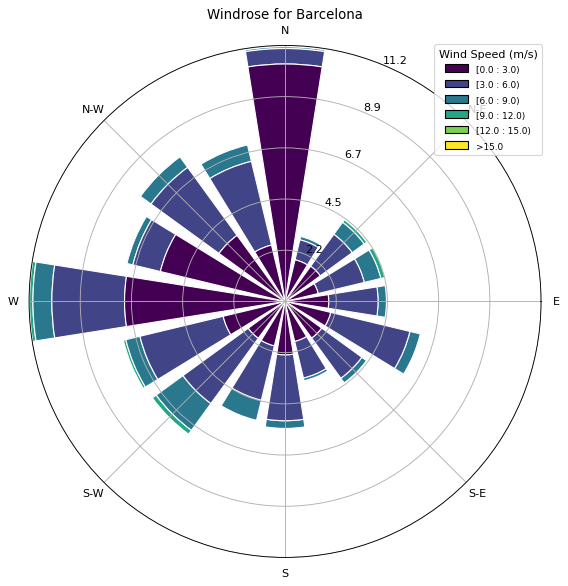

In [104]:
ax = WindroseAxes.from_ax()
ax.bar(city_dfs[3].wind_deg, city_dfs[3].wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title(f"Windrose for {city_names[3]}")

Text(0.5, 1.0, 'Windrose for Seville')

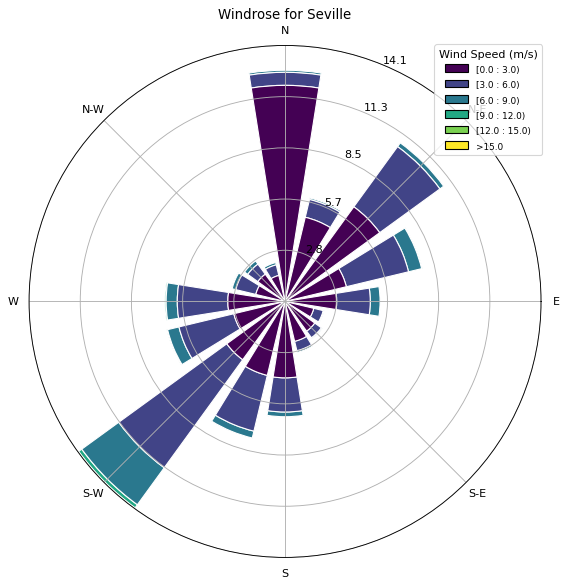

In [105]:
ax = WindroseAxes.from_ax()
ax.bar(city_dfs[4].wind_deg, city_dfs[4].wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title = 'Wind Speed (m/s)', loc='best')
plt.title(f"Windrose for {city_names[4]}")

# 3.0 Visualizing basic energy data

In [47]:
energy_data.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                      1051.0   
2015-01-01 01:00:00+01:00                                      1009.0   
2015-01-01 02:00:00+01:00                                       973.0   
2015-01-01 03:00:00+01:00                                       949.0   
2015-01-01 04:00:00+01:00                                       953.0   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                            1899.0   
2015-01-01 01:00:00+01:00                            1658.0   
2015-01-01 02:00:00+01:00                            1371.0   
2015-01-01 03:00:00+01:00                             779.0   
2015-01-01 04:00:00+01:00                             720.0   

                           generation marine  generation nuclear  ...  \
time                                                              ...   
2015-01-01 00:00:00+01:00                0.0              7096.0  ...   
2015-01-01 01:00:00+01:00                0.0              7096.0  ...   
2015-01-01 02:00:00+01:00                0.0              7099.0  ...   
2015-01-01 03:00:00+01:00                0.0              7098.0  ...   
2015-01-01 04:00:00+01:00                0.0              7097.0  ...   

                           generation waste  generation wind onshore  \
time                                                                   
2015-01-01 00:00:00+01:00             196.0                   6378.0   
2015-01-01 01:00:00+01:00             195.0                   5890.0   
2015-01

In [49]:
#Subset data without forcast, totals or price data
non_gen = ["forecast solar day ahead", "forecast wind onshore day ahead", "total load forecast", "total load actual", "price day ahead", "price actual", "gen_total", "diff_gen_load"]
energy_gen = energy_data.drop(columns = non_gen)
energy_gen.columns = energy_gen.columns.str.replace("generation ", "")
energy_gen.head()

biomass  fossil brown coal/lignite  fossil gas  \
time                                                                        
2015-01-01 00:00:00+01:00    447.0                      329.0      4844.0   
2015-01-01 01:00:00+01:00    449.0                      328.0      5196.0   
2015-01-01 02:00:00+01:00    448.0                      323.0      4857.0   
2015-01-01 03:00:00+01:00    438.0                      254.0      4314.0   
2015-01-01 04:00:00+01:00    428.0                      187.0      4130.0   

                           fossil hard coal  fossil oil  \
time                                                      
2015-01-01 00:00:00+01:00            4821.0       162.0   
2015-01-01 01:00:00+01:00            4755.0       158.0   
2015-01-01 02:00:00+01:00            4581.0       157.0   
2015-01-01 03:00:00+01:00            4131.0       160.0   
2015-01-01 04:00:00+01:00            3840.0       156.0   

                           hydro pumped storage consumption  \
time                                                          
2015-01-01 00:00:00+01:00                             863.0   
2015-01-01 01:00:00+01:00                             920.0   
2015-01-01 02:00:00+01:00                            1164.0   
2015-01-01 03:00:00+01:00                            1503.0   
2015-01-01 04:00:00+01:00                            1826.0   

                           hydro run-of-river and poundage  \
time                                                         
2015-01-01 00:00:00+01:00                           1051.0   
2015-01-01 01:00:00+01:00                           1009.0   
2015-01-01 02:00:00+01:00                            973.0   
2015-01-01 03:00:00+01:00                            949.0   
2015-01-01 04:00:00+01:00                            953.0   

                           hydro water reservoir  marine  nuclear  other  \
time                                                                       
2015-01-01 00:00:00+01:00                 1899.0     0.0   7096.0   43.0   
2015-01-01 01:00:00+01:00                 1658.0     0.0   7096.0   43.0   
2015-01-01 02:00:00+01:00                 1371.0     0.0   7099.0   43.0   
2015-01-01 03:00:00+01:00                  779.0     0.0   7098.0   43.0   
2015-01-01 04:00:00+01:00                  720.0     0.0   7097.0   43.0   

                           other renewable  solar  waste  wind onshore  
time                                                                    
2015-01-01 00:00:00+01:00             73.0   49.0  196.0        6378.0  
2015-01-01 01:00:00+01:00             71.0   50.0  195.0        5890.0  
2015-01-01 02:00:00+01:00             73.0   50.0  196.0        5461.0  
2015-01-01 03:00:00+01:00             75.0   50.0  191.0        5238.0  
2015-01-01 04:00:00+01:00             74.0   42.0  189.0        4935.0

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'biomass'),
  Text(1, 0, 'fossil brown coal/lignite'),
  Text(2, 0, 'fossil gas'),
  Text(3, 0, 'fossil hard coal'),
  Text(4, 0, 'fossil oil'),
  Text(5, 0, 'hydro pumped storage consumption'),
  Text(6, 0, 'hydro run-of-river and poundage'),
  Text(7, 0, 'hydro water reservoir'),
  Text(8, 0, 'marine'),
  Text(9, 0, 'nuclear'),
  Text(10, 0, 'other'),
  Text(11, 0, 'other renewable'),
  Text(12, 0, 'solar'),
  Text(13, 0, 'waste'),
  Text(14, 0, 'wind onshore')])

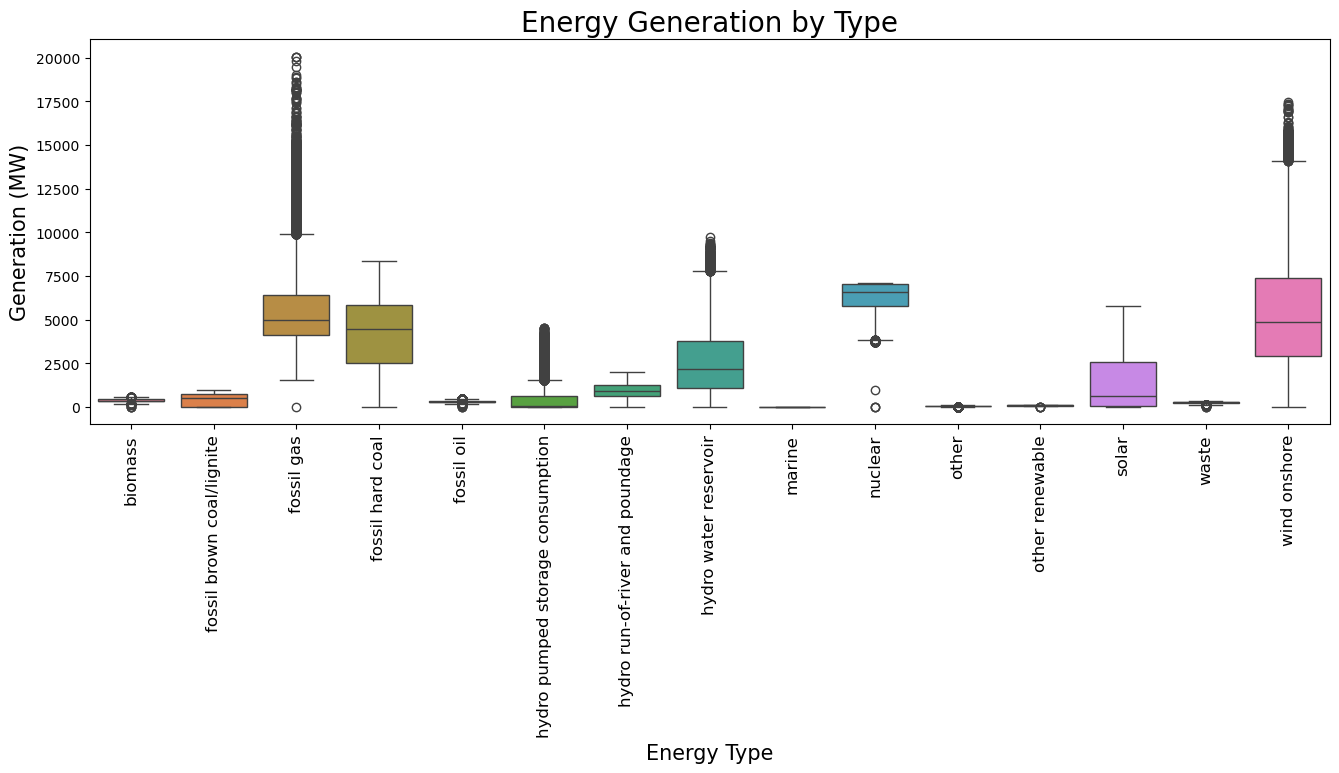

In [50]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(data=energy_gen)
plt.title('Energy Generation by Type', fontsize=20)
plt.xlabel('Energy Type', fontsize=15)
plt.ylabel('Generation (MW)', fontsize=15)
plt.xticks(fontsize=12, rotation=90)

## 3.1 Subsetting data on 2015

In [51]:
eng_mini = energy_gen.loc['2015-01-01': '2015-12-31']

In [52]:
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  # values of the x-axis
# Defining and displaying time axis ticks
ticks = eng_mini.index
#plt.xticks(ticks)

#Formatting x-axis(dates)
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
#members = df_transposed.columns  # name of the x-mens for the legend
eng_type = eng_mini.columns  # name of the x-mens for the legend
#below is a nested list of the column values, e.g. [61, 35, 20, 23], [62, 38, 9, 10], [63, 69, 56, 9]...
gen_list = eng_mini.T.values.tolist()  # values of the x-men

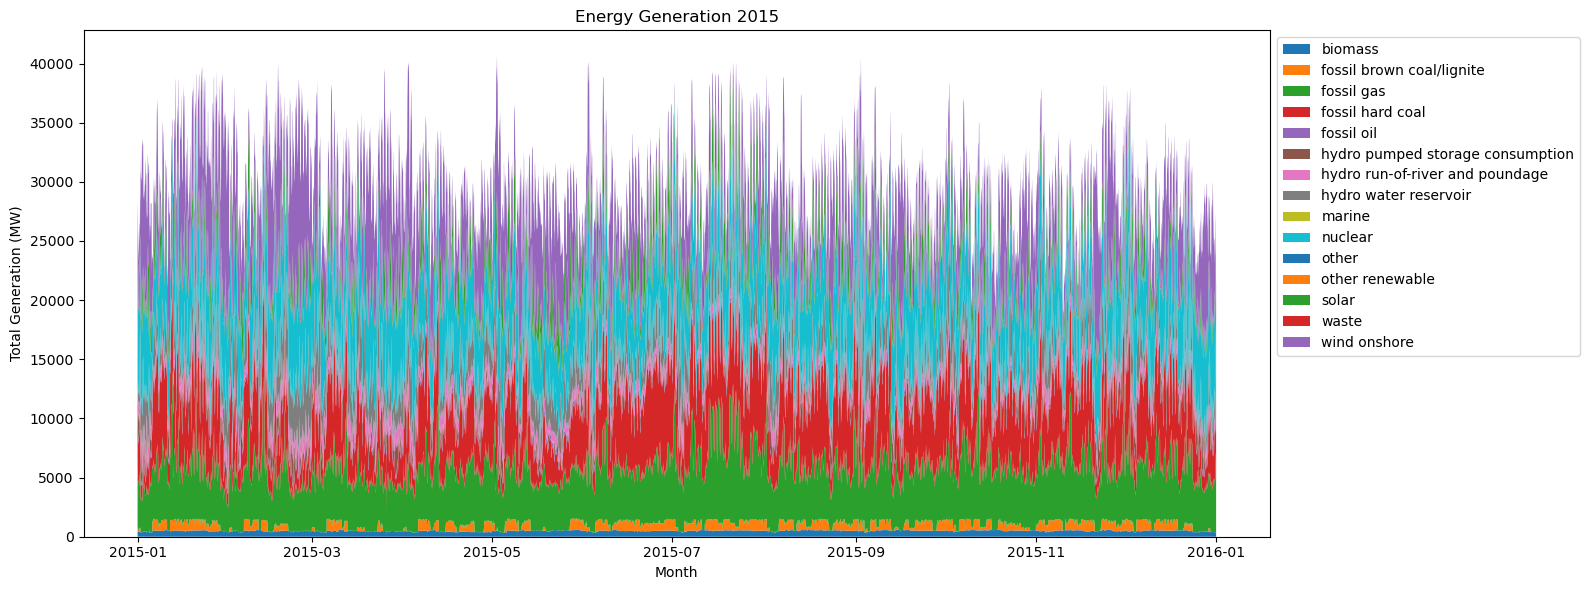

In [53]:
#simple plot

fig, ax = plt.subplots(figsize=(16, 6))
ax.stackplot(ticks, gen_list, labels=eng_type)
ax.set_title('Energy Generation 2015')
ax.set_ylabel('Total Generation (MW)')
ax.set_xlabel('Month')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()

C:\Users\keral\AppData\Local\Temp\ipykernel_20736\2104882138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mini['hour'] = eng_mini.index.hour


<Axes: xlabel='hour', ylabel='fossil gas'>

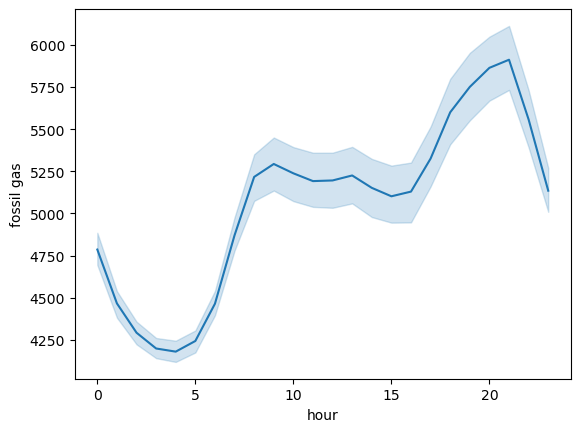

In [55]:
eng_mini['hour'] = eng_mini.index.hour
#print(eng_mini.head())
sns.lineplot(data=eng_mini, x=eng_mini.hour, y="fossil gas")

In [56]:
energy_data.index.max()

Timestamp('2018-12-31 23:00:00+0100', tz='Europe/Madrid')

## IN PLOT BELOW - TICKS ARE NOT EVENLY SPACED

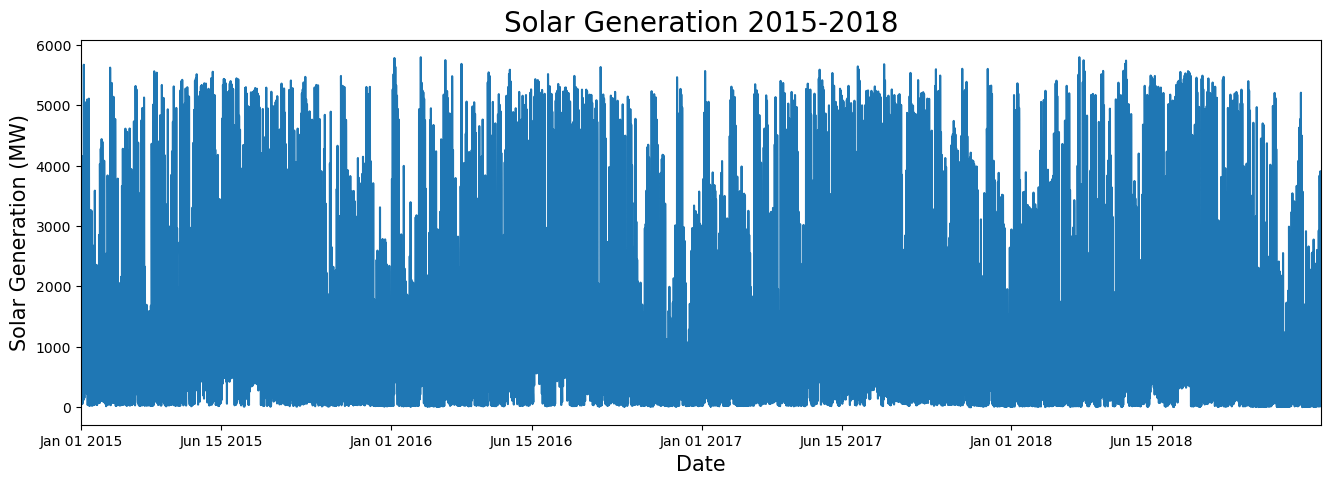

In [57]:
#Plot line plot of solar generation info
fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(energy_data.index, energy_data['generation solar'])
#plt.scatter(energy_data.index, energy_data['generation solar'], alpha=0.2)
plt.title('Solar Generation 2015-2018', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Solar Generation (MW)', fontsize=15)
plt.xlim(energy_data.index.min(), energy_data.index.max())

# Defining and displaying time axis ticks
ticks = ['2015-01-01 12:00:00+00:00', '2015-06-15 12:00:00+00:00', '2016-01-01 12:00:00+00:00',
        '2016-06-15 12:00:00+00:00', '2017-01-01 12:00:00+00:00', '2017-06-15 12:00:00+00:00',
        '2018-01-01 12:00:00+00:00', '2018-06-15 12:00:00+00:00']
plt.xticks(ticks)

#Formatting x-axis(dates)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d %Y'))

## 4.1 Heatmap of correlations

In [30]:
energy_weather.head()

city_name  temp_daily_max  pressure_daily_max  \
date                                                                       
2015-01-01 01:00:00+01:00  Barcelona       11.452313              1038.0   
2015-01-01 01:00:00+01:00     Bilbao       11.441688              1036.0   
2015-01-01 01:00:00+01:00     Madrid       10.158313              1036.0   
2015-01-01 01:00:00+01:00    Seville       13.844000              1043.0   
2015-01-01 01:00:00+01:00   Valencia       12.127344              1035.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-01 01:00:00+01:00                97.0                   1.0   
2015-01-01 01:00:00+01:00                75.0                   1.0   
2015-01-01 01:00:00+01:00                84.0                   4.0   
2015-01-01 01:00:00+01:00                84.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   

                           snow_3h_daily_max  clouds_all_daily_max  \
date                                                                 
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                  24.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   
2015-01-01 01:00:00+01:00                0.0                   0.0   

                           generation biomass_daily_max  ...  \
date                                                     ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   
2015-01-01 01:00:00+01:00                         449.0  ...   

                           generation wind onshore_daily_max  \
date                                                           
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   
2015-01-01 01:00:00+01:00                             6378.0   

                           forecast solar day ahead  \
date                                                  
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   
2015-01-01 01:00:00+01:00                    3842.0   

                           forecast wind onshore day ahead  \
date                                                         
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   
2015-01-01 01:00:00+01:00                           6436.0   

                           total load forecast  total load actual  \
date                                                                
2015-01-01 01:00:00+01:00              30739.0            29571.0   
2015-01-01 01:00:00+01:00              30739.0            29571.0   
2015-01-01 01:00:00+01:00              3

In [31]:
ew_nulls = energy_weather.isnull().sum().sort_values(ascending=False)
ew_nulls

city_name                                                0
temp_daily_max                                           0
month                                                    0
gen_total                                                0
price actual                                             0
price day ahead                                          0
total load actual                                        0
total load forecast                                      0
forecast wind onshore day ahead                          0
forecast solar day ahead                                 0
generation wind onshore_daily_max                        0
generation waste_daily_max                               0
generation solar_daily_max                               0
generation other renewable_daily_max                     0
generation other_daily_max                               0
generation nuclear_daily_max                             0
generation hydro water reservoir_daily_max              

In [33]:
#Encode categorical features (city_name, day_of_week)
ew_encode = pd.get_dummies(energy_weather)
ew_encode.head(20)

temp_daily_max  pressure_daily_max  \
date                                                            
2015-01-01 01:00:00+01:00       11.452313              1038.0   
2015-01-01 01:00:00+01:00       11.441688              1036.0   
2015-01-01 01:00:00+01:00       10.158313              1036.0   
2015-01-01 01:00:00+01:00       13.844000              1043.0   
2015-01-01 01:00:00+01:00       12.127344              1035.0   
2015-01-02 01:00:00+01:00       13.178688              1039.0   
2015-01-02 01:00:00+01:00       11.695344              1038.0   
2015-01-02 01:00:00+01:00       11.795344              1038.0   
2015-01-02 01:00:00+01:00       13.714313              1045.0   
2015-01-02 01:00:00+01:00       14.403688              1037.0   
2015-01-03 01:00:00+01:00       13.998000              1037.0   
2015-01-03 01:00:00+01:00       11.659000              1037.0   
2015-01-03 01:00:00+01:00       12.587000              1036.0   
2015-01-03 01:00:00+01:00       14.823000              1045.0   
2015-01-03 01:00:00+01:00       17.173000              1032.0   
2015-01-04 01:00:00+01:00       16.900000              1030.0   
2015-01-04 01:00:00+01:00        9.285000              1037.0   
2015-01-04 01:00:00+01:00       13.492000              1002.0   
2015-01-04 01:00:00+01:00       16.342000              1042.0   
2015-01-04 01:00:00+01:00       16.592000              1018.0   

                           humidity_daily_max  wind_speed_daily_max  \
date                                                                  
2015-01-01 01:00:00+01:00               100.0                   7.0   
2015-01-01 01:00:00+01:00                97.0                   1.0   
2015-01-01 01:00:00+01:00                75.0                   1.0   
2015-01-01 01:00:00+01:00                84.0                   4.0   
2015-01-01 01:00:00+01:00                84.0                   2.0   
2015-01-02 01:00:00+01:00               100.0                   2.0   
2015-01-02 01:00:00+01:00                95.0                   2.0   
2015-01-02 01:00:00+01:00                79.0                   1.0   
2015-01-02 01:00:00+01:00                89.0                   4.0   
2015-01-02 01:00:00+01:00                82.0                   2.0   
2015-01-03 01:00:00+01:00               100.0                   3.0   
2015-01-03 01:00:00+01:00                97.0                   1.0   
2015-01-03 01:00:00+01:00                86.0                   2.0   
2015-01-03 01:00:00+01:00                90.0                   3.0   
2015-01-03 01:00:00+01:00                80.0                   2.0   
2015-01-04 01:00:00+01:00                89.0                   3.0   
2015-01-04 01:00:00+01:00                98.0                   1.0   
2015-01-04 01:00:00+01:00                78.0                   1.0   
2015-01-04 01:00:00+01:00                87.0                   4.0   
2015-01-04 01:00:00+01:00                92.0                   2.0   

                           rain_1h_daily_max  rain_3h_daily_max  \
date                                                              
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-01 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-02 01:00:00+01:00                0.0                0.0   
2015-01-03 01:00:00+01:00                0.0                0.0   
2015-01-03 01:00:00+01:00                0.0                0.0   
2015-01-03 01:00:00+01:00                0.0                0.0   
2015-01-03 01:00:00+01:00   

<Axes: >

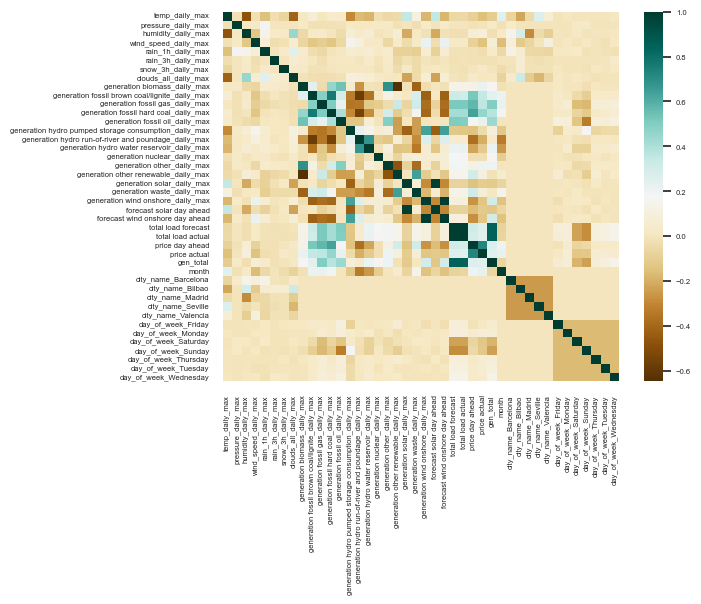

In [40]:
sns.heatmap(ew_encode.corr(), cmap='BrBG')
#sns.set(font_scale=0.5)
#plt.xticks(fontsize=6)
#plt.yticks(fontsize=6)

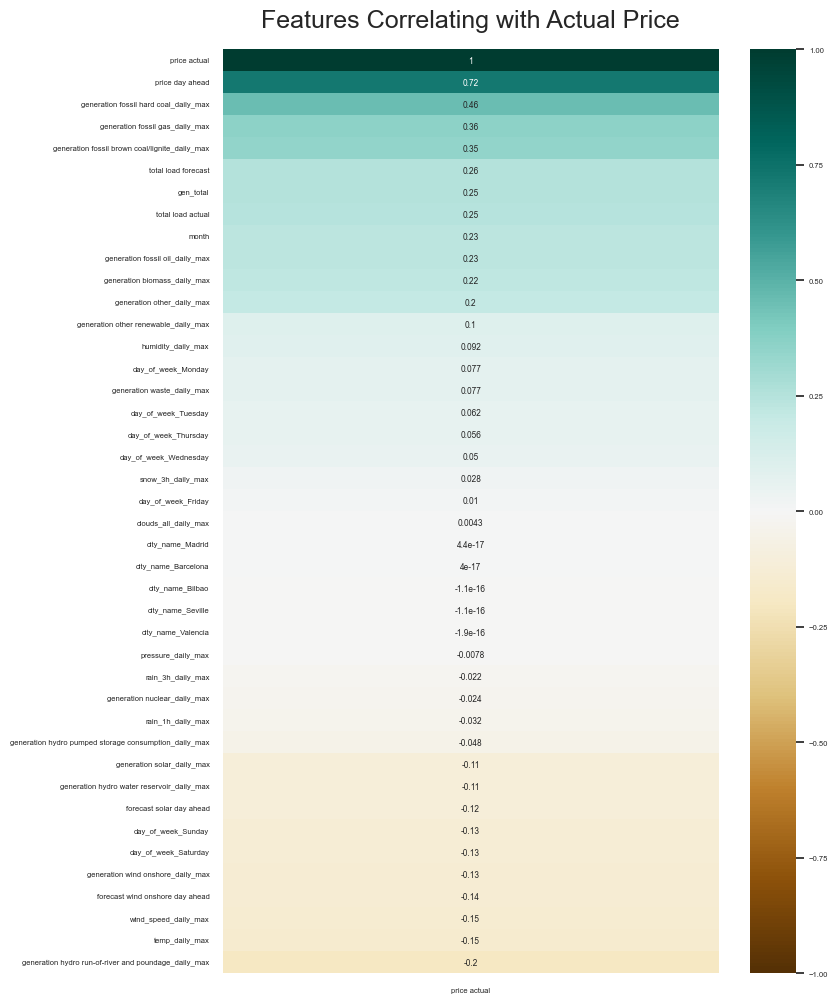

In [41]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['price actual']].sort_values(by='price actual', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Actual Price', fontdict={'fontsize':18}, pad=16);

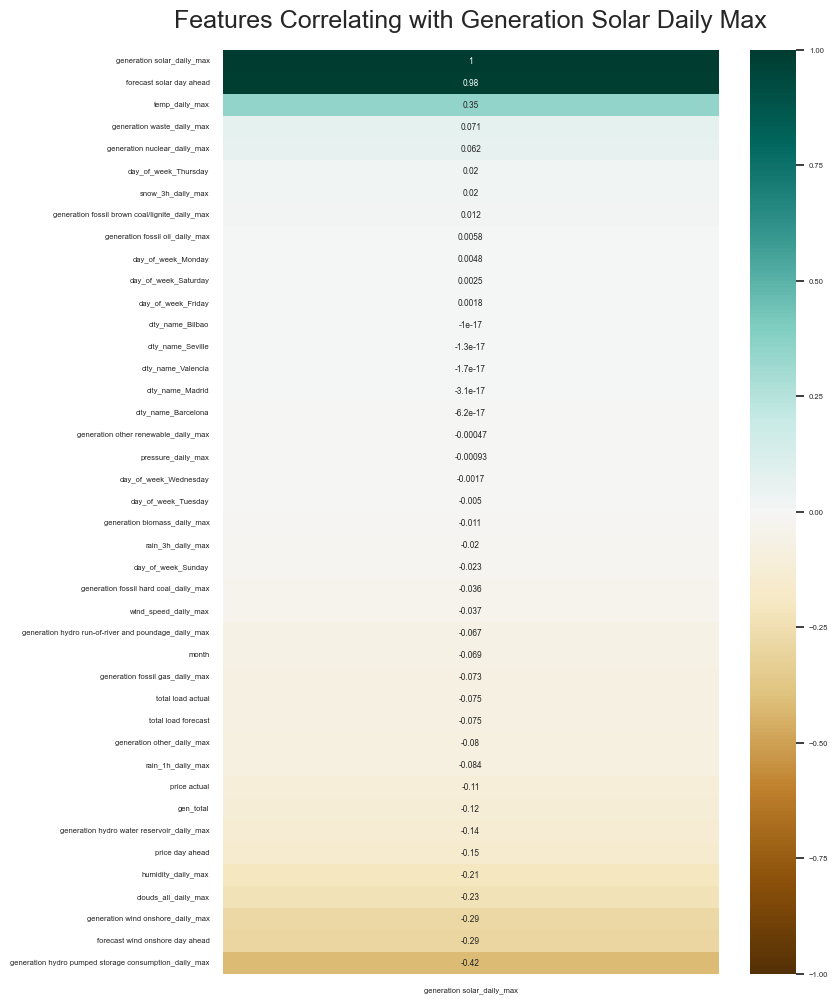

In [42]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['generation solar_daily_max']].sort_values(by='generation solar_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Generation Solar Daily Max', fontdict={'fontsize':18}, pad=16);

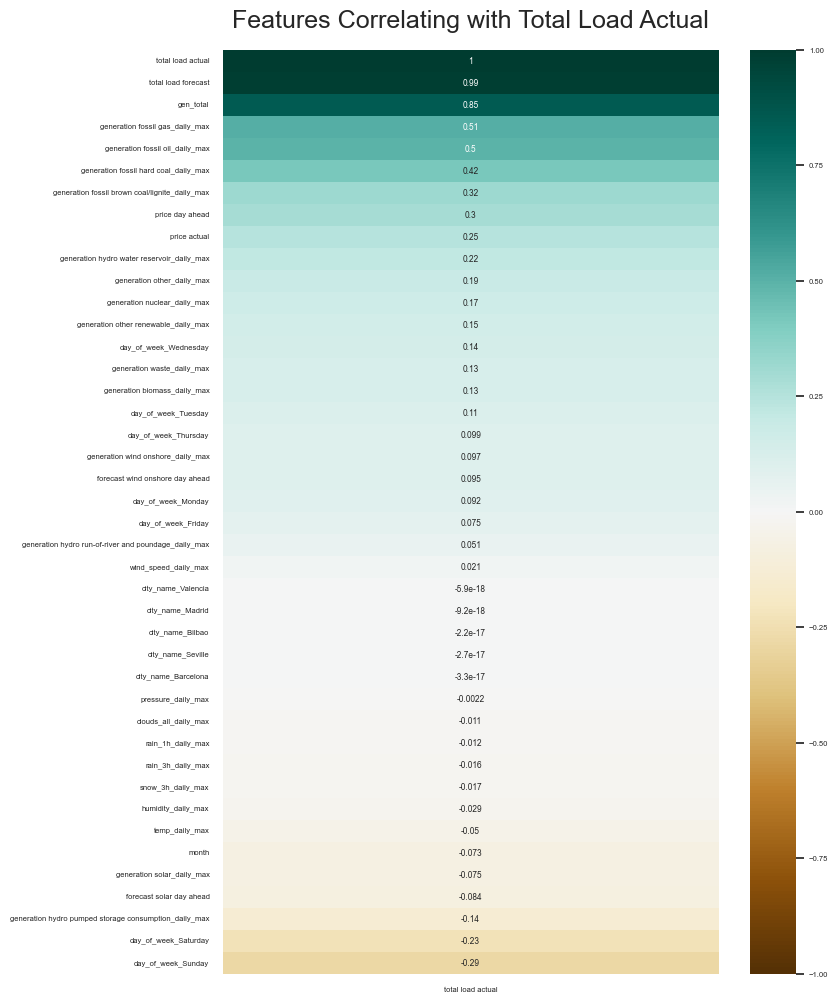

In [44]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['total load actual']].sort_values(by='total load actual', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Total Load Actual', fontdict={'fontsize':18}, pad=16);

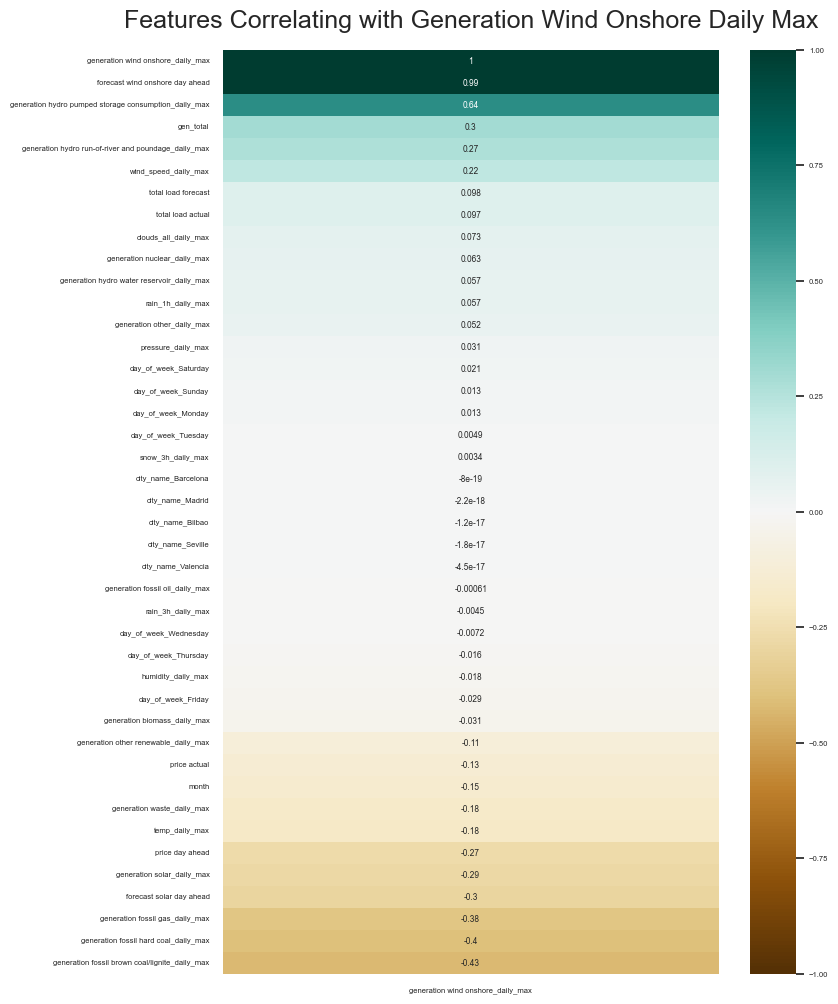

In [43]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['generation wind onshore_daily_max']].sort_values(by='generation wind onshore_daily_max', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Generation Wind Onshore Daily Max', fontdict={'fontsize':18}, pad=16);

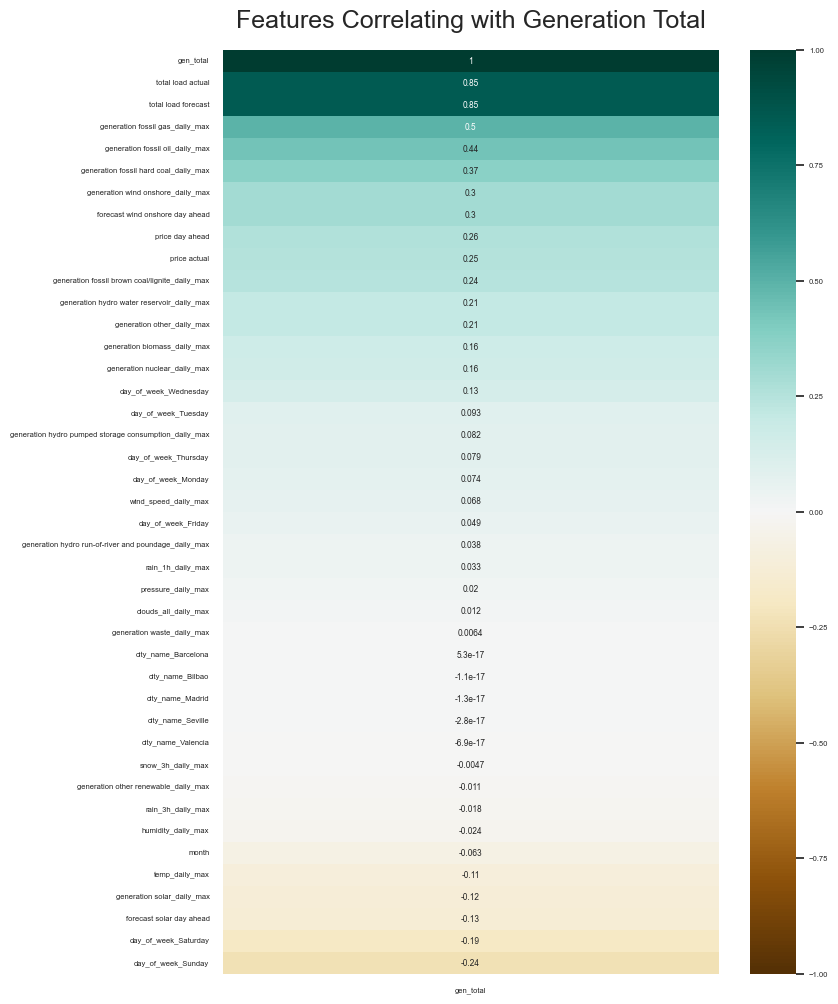

In [45]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ew_encode.corr()[['gen_total']].sort_values(by='gen_total', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Generation Total', fontdict={'fontsize':18}, pad=16);

## 3.2 Visualizing day ahead or forcast v. actual

<b>Graph - solar & solar day ahead, wind and wind day ahead, load forcast and load actual, price day ahead and price actual</b>

In [68]:
eng_grouped_max.shape

(1461, 24)

In [62]:
eng_grouped_max.head()

generation biomass_daily_max  \
date                                                      
2015-01-01 01:00:00+01:00                         449.0   
2015-01-02 01:00:00+01:00                         443.0   
2015-01-03 01:00:00+01:00                         478.0   
2015-01-04 01:00:00+01:00                         438.0   
2015-01-05 01:00:00+01:00                         376.0   

                           generation fossil brown coal/lignite_daily_max  \
date                                                                        
2015-01-01 01:00:00+01:00                                           329.0   
2015-01-02 01:00:00+01:00                                             0.0   
2015-01-03 01:00:00+01:00                                             0.0   
2015-01-04 01:00:00+01:00                                             0.0   
2015-01-05 01:00:00+01:00                                           326.0   

                           generation fossil gas_daily_max  \
date                                                         
2015-01-01 01:00:00+01:00                           5196.0   
2015-01-02 01:00:00+01:00                           6082.0   
2015-01-03 01:00:00+01:00                           4157.0   
2015-01-04 01:00:00+01:00                           3997.0   
2015-01-05 01:00:00+01:00                           5699.0   

                           generation fossil hard coal_daily_max  \
date                                                               
2015-01-01 01:00:00+01:00                                 5043.0   
2015-01-02 01:00:00+01:00                                 1432.0   
2015-01-03 01:00:00+01:00                                 1798.0   
2015-01-04 01:00:00+01:00                                 2755.0   
2015-01-05 01:00:00+01:00                                 4247.0   

                           generation fossil oil_daily_max  \
date                                                         
2015-01-01 01:00:00+01:00                            167.0   
2015-01-02 01:00:00+01:00                            220.0   
2015-01-03 01:00:00+01:00                            250.0   
2015-01-04 01:00:00+01:00                            394.0   
2015-01-05 01:00:00+01:00                            352.0   

                           generation hydro pumped storage consumption_daily_max  \
date                                                                               
2015-01-01 01:00:00+01:00                                             2170.0       
2015-01-02 01:00:00+01:00                                             3269.0       
2015-01-03 01:00:00+01:00                                             2953.0       
2015-01-04 01:00:00+01:00                                             2185.0       
2015-01-05 01:00:00+01:00                                             2365.0       

                           generation hydro run-of-river and poundage_daily_max  \
date                                                                              
2015-01-01 01:00:00+01:00                                             1220.0      
2015-01-02 01:00:00+01:00                                             1370.0      
2015-01-03 01:00:00+01:00                                             1583.0      
2015-01-04 01:00:00+01:00                                             1616.0      
2015-01-05 01:00:00+01:00                                             1328.0      

                           generation hydro water reservoir_daily_max  \
date                                                                    
2015-01-01 01:00:00+01:00                                      6231.0   
2015-01-02 01:00:00+01:00                                      5902.0   
2015-01-03 01:00:00+01:00                                      5985.0   
2015-01-04 01:00:00+01:00                                      5936.0   
2015-01-05 01:00:00+01:00                                      3732.0   

                           generation marin

In [152]:
df_price = eng_grouped_max[['price day ahead', 'price actual']]
df_price.reset_index(inplace=True)
df_price.head()

date  price day ahead  price actual
0 2015-01-01 01:00:00+01:00            62.69         75.64
1 2015-01-02 01:00:00+01:00            52.01         83.33
2 2015-01-03 01:00:00+01:00            44.00         72.86
3 2015-01-04 01:00:00+01:00            40.48         76.49
4 2015-01-05 01:00:00+01:00            62.00         90.97

In [153]:
df_melt = pd.melt(df_price, id_vars=['date'])
df_melt

date         variable  value
0    2015-01-01 01:00:00+01:00  price day ahead  62.69
1    2015-01-02 01:00:00+01:00  price day ahead  52.01
2    2015-01-03 01:00:00+01:00  price day ahead  44.00
3    2015-01-04 01:00:00+01:00  price day ahead  40.48
4    2015-01-05 01:00:00+01:00  price day ahead  62.00
...                        ...              ...    ...
2917 2018-12-27 01:00:00+01:00     price actual  81.12
2918 2018-12-28 01:00:00+01:00     price actual  78.26
2919 2018-12-29 01:00:00+01:00     price actual  71.01
2920 2018-12-30 01:00:00+01:00     price actual  73.64
2921 2018-12-31 01:00:00+01:00     price actual  77.61

[2922 rows x 3 columns]

<Axes: xlabel='date', ylabel='value'>

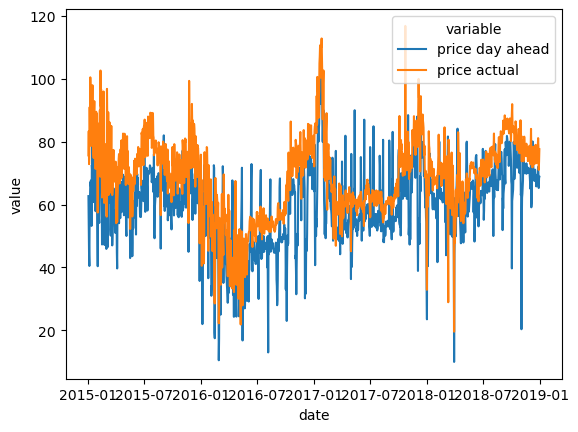

In [154]:
sns.lineplot(df_melt, x='date', y='value', hue='variable')

C:\Users\keral\AppData\Local\Temp\ipykernel_22776\1229723226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['price_diff'] = df_price['price actual']-df_price['price day ahead']


Text(0, 0.5, 'Price (Euro)')

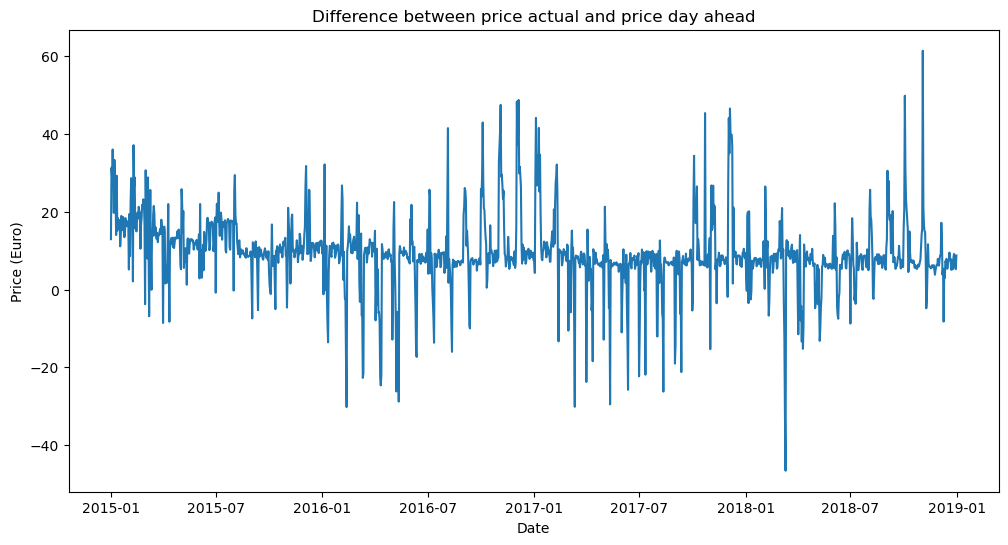

In [169]:
df_price['price_diff'] = df_price['price actual']-df_price['price day ahead']
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_price, x='date', y='price_diff')
plt.title('Difference between price actual and price day ahead')
plt.xlabel('Date')
plt.ylabel('Price (Euro)')

C:\Users\keral\AppData\Local\Temp\ipykernel_22776\4192371068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solar['solar_diff'] = df_solar['generation solar_daily_max']-df_solar['forecast solar day ahead']


Text(0, 0.5, 'Difference in MW')

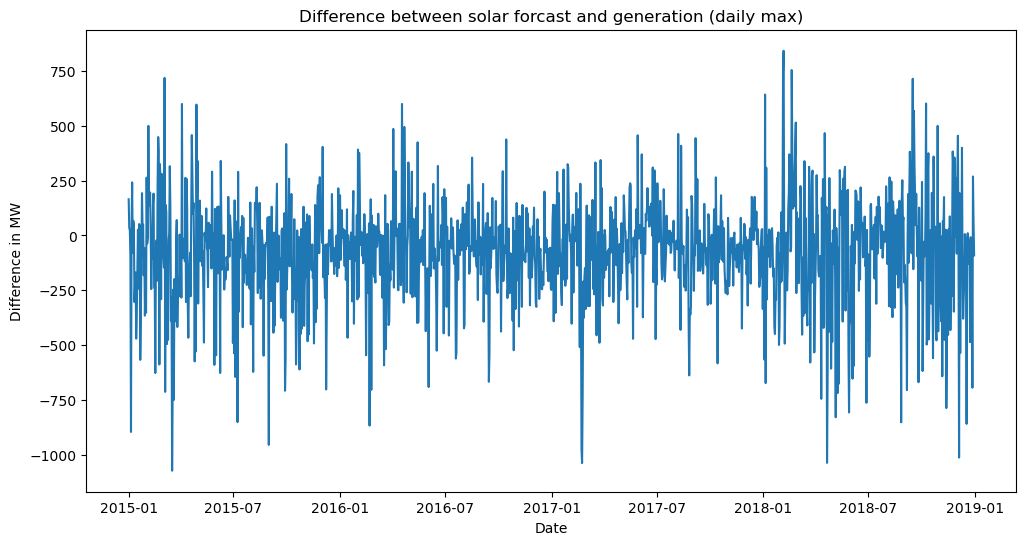

In [170]:
df_solar = eng_grouped_max[['forecast solar day ahead', 'generation solar_daily_max']]
df_solar.reset_index(inplace=True)
df_solar.head()
df_solar['solar_diff'] = df_solar['generation solar_daily_max']-df_solar['forecast solar day ahead']
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_solar, x='date', y='solar_diff')
plt.title('Difference between solar forcast and generation (daily max)')
plt.xlabel('Date')
plt.ylabel('Difference in MW')

C:\Users\keral\AppData\Local\Temp\ipykernel_22776\399460347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind['wind_diff'] = df_wind['generation wind onshore_daily_max']-df_wind['forecast wind onshore day ahead']


Text(0, 0.5, 'Difference in MW')

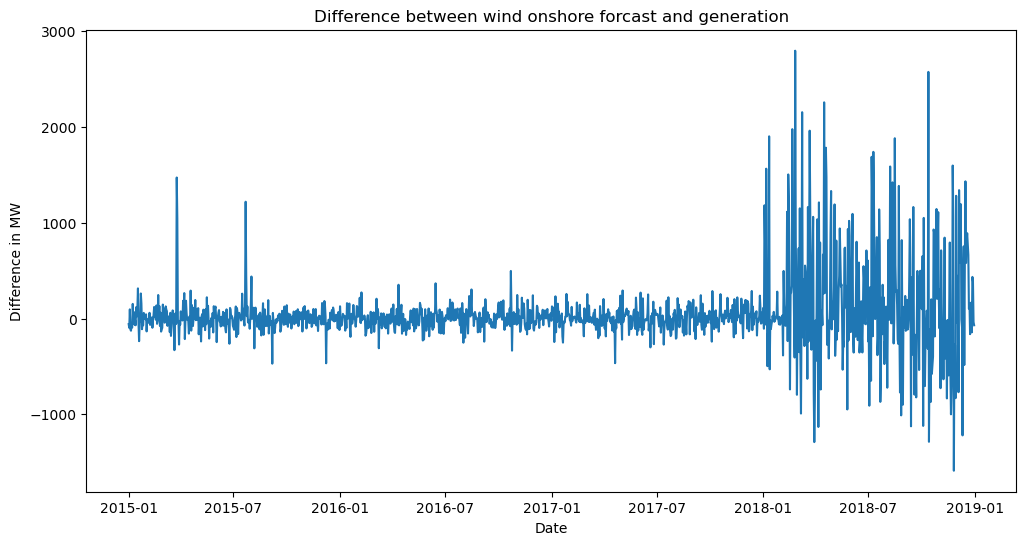

In [168]:
df_wind = eng_grouped_max[['forecast wind onshore day ahead', 'generation wind onshore_daily_max']]
df_wind.reset_index(inplace=True)
df_wind.head()
df_wind['wind_diff'] = df_wind['generation wind onshore_daily_max']-df_wind['forecast wind onshore day ahead']
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_wind, x='date', y='wind_diff')
plt.title('Difference between wind onshore forcast and generation (daily max)')
plt.xlabel('Date')
plt.ylabel('Difference in MW')

C:\Users\keral\AppData\Local\Temp\ipykernel_22776\3284164560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_load['load_diff'] = df_load['total load actual']-df_load['total load forecast']


Text(0, 0.5, 'Difference in MW')

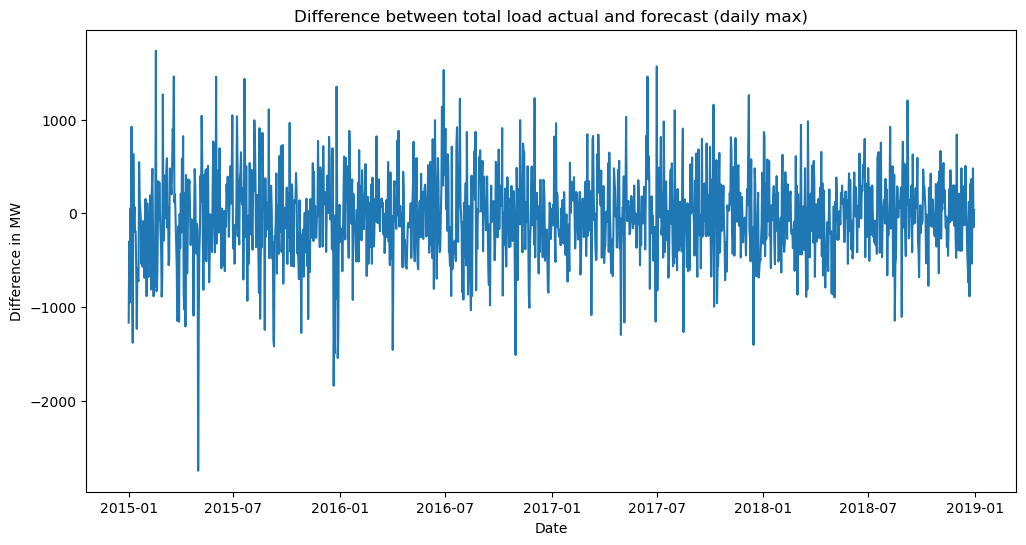

In [171]:
df_load = eng_grouped_max[['total load forecast', 'total load actual']]
df_load.reset_index(inplace=True)
df_load['load_diff'] = df_load['total load actual']-df_load['total load forecast']
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_load, x='date', y='load_diff')
plt.title('Difference between total load actual and forecast (daily max)')
plt.xlabel('Date')
plt.ylabel('Difference in MW')

C:\Users\keral\AppData\Local\Temp\ipykernel_22776\2122491583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_load_gen['load_gen_diff'] = df_load_gen['gen_total']-df_load_gen['total load actual']


Text(0, 0.5, 'Difference in MW')

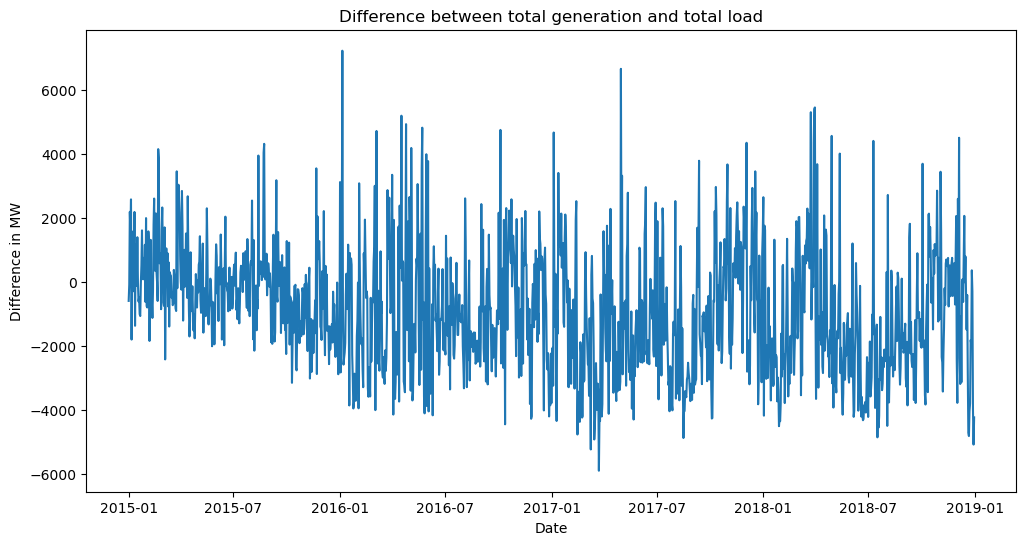

In [172]:
df_load_gen = eng_grouped_max[['gen_total', 'total load actual']]
df_load.reset_index(inplace=True)
df_load_gen['load_gen_diff'] = df_load_gen['gen_total']-df_load_gen['total load actual']
fig,ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_load_gen, x='date', y='load_gen_diff')
plt.title('Difference between total generation and total load')
plt.xlabel('Date')
plt.ylabel('Difference in MW')

In [141]:
eng_grouped_max.columns

Index(['generation biomass_daily_max',
       'generation fossil brown coal/lignite_daily_max',
       'generation fossil gas_daily_max',
       'generation fossil hard coal_daily_max',
       'generation fossil oil_daily_max',
       'generation hydro pumped storage consumption_daily_max',
       'generation hydro run-of-river and poundage_daily_max',
       'generation hydro water reservoir_daily_max',
       'generation nuclear_daily_max', 'generation other_daily_max',
       'generation other renewable_daily_max', 'generation solar_daily_max',
       'generation waste_daily_max', 'generation wind onshore_daily_max',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'gen_total', 'month', 'day_of_week'],
      dtype='object')

<Axes: xlabel='date', ylabel='value'>

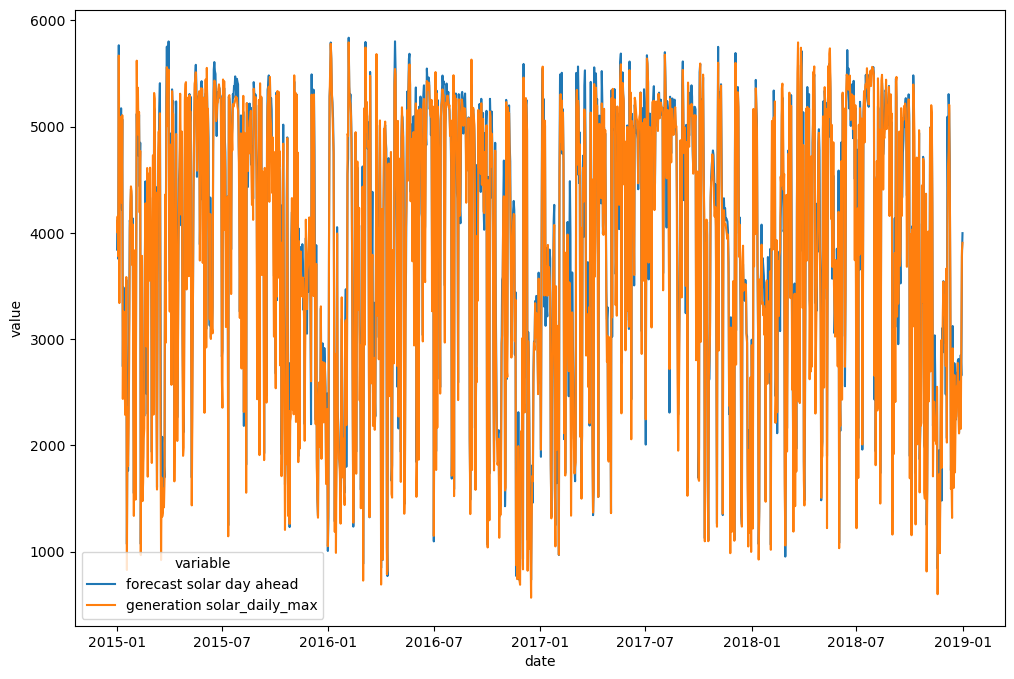

In [149]:
# solar
df_solar = eng_grouped_max[['forecast solar day ahead', 'generation solar_daily_max']]
df_solar.reset_index(inplace=True)
df_solar.head()
df_melt = pd.melt(df_price, id_vars=['date'])
df_melt
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(df_melt, x='date', y='value', hue='variable')
#plt.setp(ax.lines, alpha=.6)